In [ ]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
! pwd

Mounted at /content/Mdrive
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import numpy as np
import math as math
from scipy import stats
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature 
import xarray as xr
import numpy.ma as ma
import datetime as dt
import seaborn as sns
import requests
from datetime import datetime as dt
from datetime import timedelta as td
from pandas.core.indexes.interval import date_range
from scipy.stats.stats import chisquare
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 37.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669752 sha256=d07fa97b5a47ad5e206c294de3e11922a9359a477a1ef2da3f3646d4a15e5b57
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 19.1 MB/s 
  Installing build dependencies ... do

In [ ]:
dp = pd.read_excel('Libro_estaciones.xlsx',sheet_name='P')
dtmin = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMin')
dtmax = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMax')
print('---------------------PRECIPITACIÓN--------------------------------',end='\n ')
print('___________________________________________________________________')
display(dp)
print('----------------- TEMPERATURA MÍNIMA------------------------------',end='\n ')
print('___________________________________________________________________')
display(dtmin)
print('------------------TEMPERATURA MÍNIMA-------------------------------',end='\n ')
print('___________________________________________________________________')
display(dtmax)

---------------------PRECIPITACIÓN--------------------------------
 ___________________________________________________________________


Codigo                                     Estacion  \
0   52055210                      BOTANA - AUT [52055210]   
1   21135050                          JULIA LA [21135050]   
2   21205710            JARDIN BOTANICO  - AUT [21205710]   
3   21205420                         TIBAITATA [21205420]   
4   26215020                       CANAFISANTO [26215020]   
5   23095010          AEROPUERTO PUERTO BERRIO [23095010]   
6   23155040                         CENTRO EL [23155040]   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]   
8   27045020                            CASERI [27045020]   
9   23215030                      AGUAS CLARAS [23215030]   
10  16015040                      SANTA ISABEL [16015040]   
11  48015050           AEROPUERTO VASQUEZ COBO [48015050]   
12  47075010                       LA CHORRERA [47075010]   
13  47045010                  PUERTO LEGUIZAMO [47045010]   
14  42075010                              MITU [42075010]   
15  44035030                          MACAGUAL [44035030]   
16  46015030     SAN VICENTE DEL CAGUAN  - AUT [46015030]   
17  32155010                        MAPIRIPANA [32155010]   
18  31095030              PUERTO INIRIDA - AUT [31095030]   
19  54075020                       BAJO CALIMA [54075020]   
20  54085010                           NOANAMA [54085010]   
21  54025010                   SAN JOSE PALMAR [54025010]   
22  11045010              AEROPUERTO EL CARANO [11045010]   
23  56015010                      PANAMERICANA [56015010]   
24  11125010                       TERESITA LA [11125010]   
25  12025040                       TURBO - AUT [12025040]   
26  12025030                        MELLITO EL [12025030]   
27  13085050                 LORICA  ITA - AUT [13085050]   
28  25025002                  LOS ALAMOS - AUT [25025002]   
29  28035040                         GUAYMARAL [28035040]   
30  14015030                ESCUELA NAVAL CIOH [14015030]   
31  29045120                        FLORES LAS [29045120]   
32  15015060                SAN LORENZO  - AUT [15015060]   
33  15075030                           MANAURE [15075030]   
34  32075060                    COOPERATIVA LA [32075060]   
35  34015010                      LAS GAVIOTAS [34015010]   
36  35225030                     MODULOS - AUT [35225030]   
37  35215020            AEROPUERTO YOPAL - AUT [35215020]   
38  38015030         AEROPUERTO PUERTO CARRENO [38015030]   
39  36025010                              TAME [36025010]   
40  37045010                   SARAVENA  - AUT [37045010]   
41  37055010        AEROPUERTO SANTIAGO PÃ‰REZ [37055010]   
42  57025020                     GORGONA GUAPI [57025020]   
43  57015010                   MALPELO  - AUT  [57015010]   
44  14015060                 ISLAS DEL ROSARIO [14015060]   
45  17015010       AEROPUERTO SESQUICENTENARIO [17015010]   
46  17025020             AEROPUERTO EL EMBRUJO [17025020]   

                Departamento                    Municipio  Identificador  \
0                     Nariño                        Pasto              0   
1                      Huila                        Neiva              0   
2               Cundinamarca                       Bogota              0   
3               Cundinamarca                     Mosquera              0   
4                  Antioquia        Santa_Fe_De_Antioquia              0   
5                  Antioquia                Puerto_Berrio              0   
6                  Santander              Barrancabermeja              0   
7                  Santander                  Bucaramanga              0   
8                      Cauca                      Cucasia              0   
9                      Cesar                    Aguachica              0   
10        Norte_de_Santander                       Cucuta              0   
11                  Amazonas                      Leticia              1   
12                  Amazonas                  La_Chorrera              1   
13           

----------------- TEMPERATURA MÍNIMA------------------------------
 ___________________________________________________________________


Codigo                                     Estacion  \
0   52055210                      BOTANA - AUT [52055210]   
1   21135050                          JULIA LA [21135050]   
2   21205710            JARDIN BOTANICO  - AUT [21205710]   
3   21205420                         TIBAITATA [21205420]   
4   26215020                       CANAFISANTO [26215020]   
5   23095010          AEROPUERTO PUERTO BERRIO [23095010]   
6   23155040                         CENTRO EL [23155040]   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]   
8   27045020                            CASERI [27045020]   
9   23215030                      AGUAS CLARAS [23215030]   
10  16015040                      SANTA ISABEL [16015040]   
11  48015050           AEROPUERTO VASQUEZ COBO [48015050]   
12  47075010                       LA CHORRERA [47075010]   
13  47045010                  PUERTO LEGUIZAMO [47045010]   
14  42075010                              MITU [42075010]   
15  44035030                          MACAGUAL [44035030]   
16  46015030     SAN VICENTE DEL CAGUAN  - AUT [46015030]   
17  32155010                        MAPIRIPANA [32155010]   
18  31095030              PUERTO INIRIDA - AUT [31095030]   
19  54075020                       BAJO CALIMA [54075020]   
20  54085010                           NOANAMA [54085010]   
21  54025010                   SAN JOSE PALMAR [54025010]   
22  11045010              AEROPUERTO EL CARANO [11045010]   
23  56015010                      PANAMERICANA [56015010]   
24  11125010                       TERESITA LA [11125010]   
25  12025040                       TURBO - AUT [12025040]   
26  12025030                        MELLITO EL [12025030]   
27  13085050                 LORICA  ITA - AUT [13085050]   
28  25025002                  LOS ALAMOS - AUT [25025002]   
29  28035040                         GUAYMARAL [28035040]   
30  14015030                ESCUELA NAVAL CIOH [14015030]   
31  29045120                        FLORES LAS [29045120]   
32  15015060                SAN LORENZO  - AUT [15015060]   
33  15075030                           MANAURE [15075030]   
34  32075060                    COOPERATIVA LA [32075060]   
35  34015010                      LAS GAVIOTAS [34015010]   
36  35225030                     MODULOS - AUT [35225030]   
37  35215020            AEROPUERTO YOPAL - AUT [35215020]   
38  38015030         AEROPUERTO PUERTO CARRENO [38015030]   
39  36025010                              TAME [36025010]   
40  37045010                   SARAVENA  - AUT [37045010]   
41  37055010        AEROPUERTO SANTIAGO PÃ‰REZ [37055010]   
42  57025020                     GORGONA GUAPI [57025020]   
43  57015010                   MALPELO  - AUT  [57015010]   
44  14015060                 ISLAS DEL ROSARIO [14015060]   
45  17015010       AEROPUERTO SESQUICENTENARIO [17015010]   
46  17025020             AEROPUERTO EL EMBRUJO [17025020]   

                Departamento                    Municipio  Identificador  \
0                     Nariño                        Pasto              0   
1                      Huila                        Neiva              0   
2               Cundinamarca                       Bogota              0   
3               Cundinamarca                     Mosquera              0   
4                  Antioquia        Santa_Fe_De_Antioquia              0   
5                  Antioquia                Puerto_Berrio              0   
6                  Santander              Barrancabermeja              0   
7                  Santander                  Bucaramanga              0   
8                      Cauca                      Cucasia              0   
9                      Cesar                    Aguachica              0   
10        Norte_de_Santander                       Cucuta              0   
11                  Amazonas                      Leticia              1   
12                  Amazonas                  La_Chorrera              1   
13           

------------------TEMPERATURA MÍNIMA-------------------------------
 ___________________________________________________________________


Codigo                                     Estacion  \
0   52055210                      BOTANA - AUT [52055210]   
1   21135050                          JULIA LA [21135050]   
2   21205710            JARDIN BOTANICO  - AUT [21205710]   
3   21205420                         TIBAITATA [21205420]   
4   26215020                       CANAFISANTO [26215020]   
5   23095010          AEROPUERTO PUERTO BERRIO [23095010]   
6   23155040                         CENTRO EL [23155040]   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]   
8   27045020                            CASERI [27045020]   
9   23215030                      AGUAS CLARAS [23215030]   
10  16015040                      SANTA ISABEL [16015040]   
11  48015050           AEROPUERTO VASQUEZ COBO [48015050]   
12  47075010                       LA CHORRERA [47075010]   
13  47045010                  PUERTO LEGUIZAMO [47045010]   
14  42075010                              MITU [42075010]   
15  44035030                          MACAGUAL [44035030]   
16  46015030     SAN VICENTE DEL CAGUAN  - AUT [46015030]   
17  32155010                        MAPIRIPANA [32155010]   
18  31095030              PUERTO INIRIDA - AUT [31095030]   
19  54075020                       BAJO CALIMA [54075020]   
20  54085010                           NOANAMA [54085010]   
21  54025010                   SAN JOSE PALMAR [54025010]   
22  11045010              AEROPUERTO EL CARANO [11045010]   
23  56015010                      PANAMERICANA [56015010]   
24  11125010                       TERESITA LA [11125010]   
25  12025040                       TURBO - AUT [12025040]   
26  12025030                        MELLITO EL [12025030]   
27  13085050                 LORICA  ITA - AUT [13085050]   
28  25025002                  LOS ALAMOS - AUT [25025002]   
29  28035040                         GUAYMARAL [28035040]   
30  14015030                ESCUELA NAVAL CIOH [14015030]   
31  29045120                        FLORES LAS [29045120]   
32  15015060                SAN LORENZO  - AUT [15015060]   
33  15075030                           MANAURE [15075030]   
34  32075060                    COOPERATIVA LA [32075060]   
35  34015010                      LAS GAVIOTAS [34015010]   
36  35225030                     MODULOS - AUT [35225030]   
37  35215020            AEROPUERTO YOPAL - AUT [35215020]   
38  38015030         AEROPUERTO PUERTO CARRENO [38015030]   
39  36025010                              TAME [36025010]   
40  37045010                   SARAVENA  - AUT [37045010]   
41  37055010        AEROPUERTO SANTIAGO PÃ‰REZ [37055010]   
42  57025020                     GORGONA GUAPI [57025020]   
43  57015010                   MALPELO  - AUT  [57015010]   
44  14015060                 ISLAS DEL ROSARIO [14015060]   
45  17015010       AEROPUERTO SESQUICENTENARIO [17015010]   
46  17025020             AEROPUERTO EL EMBRUJO [17025020]   

                Departamento                    Municipio  Identificador  \
0                     Nariño                        Pasto              0   
1                      Huila                        Neiva              0   
2               Cundinamarca                       Bogota              0   
3               Cundinamarca                     Mosquera              0   
4                  Antioquia        Santa_Fe_De_Antioquia              0   
5                  Antioquia                Puerto_Berrio              0   
6                  Santander              Barrancabermeja              0   
7                  Santander                  Bucaramanga              0   
8                      Cauca                      Cucasia              0   
9                      Cesar                    Aguachica              0   
10        Norte_de_Santander                       Cucuta              0   
11                  Amazonas                      Leticia              1   
12                  Amazonas                  La_Chorrera              1   
13           

#Mapas

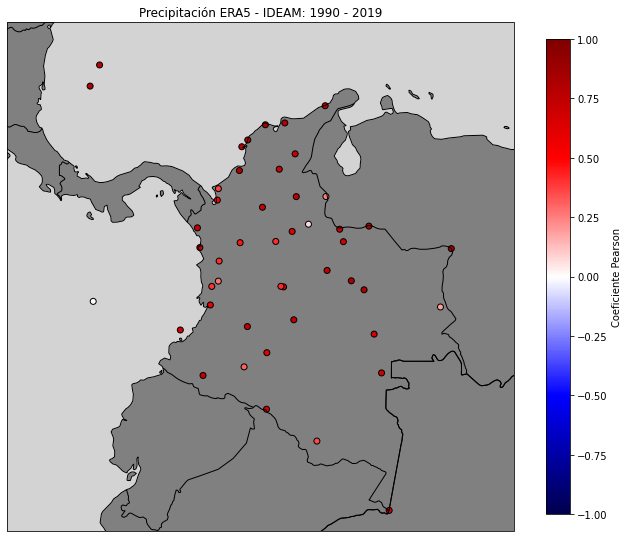

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(25,25))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Precipitación ERA5 - IDEAM: 1990 - 2019')
im1 = ax.scatter(dp['lon'],dp['lat'],c=dp['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('P.pdf',dpi=300)
plt.show()

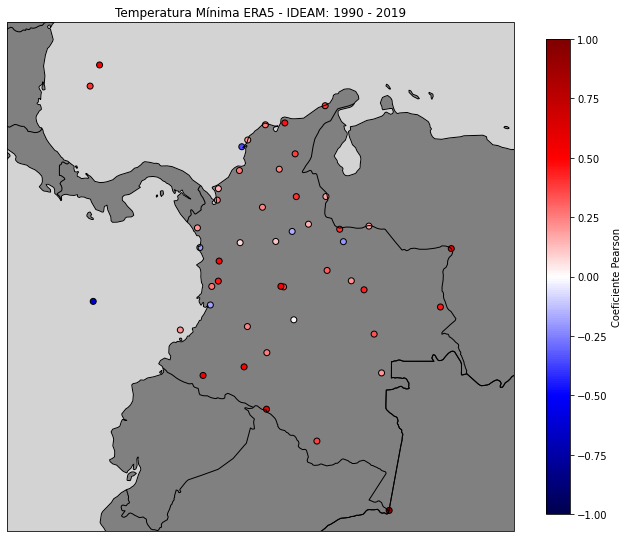

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(25,25))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Mínima ERA5 - IDEAM: 1990 - 2019')
im1 = ax.scatter(dtmin['lon'],dtmin['lat'],c=dtmin['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('TMin.pdf',dpi=300)
plt.show()

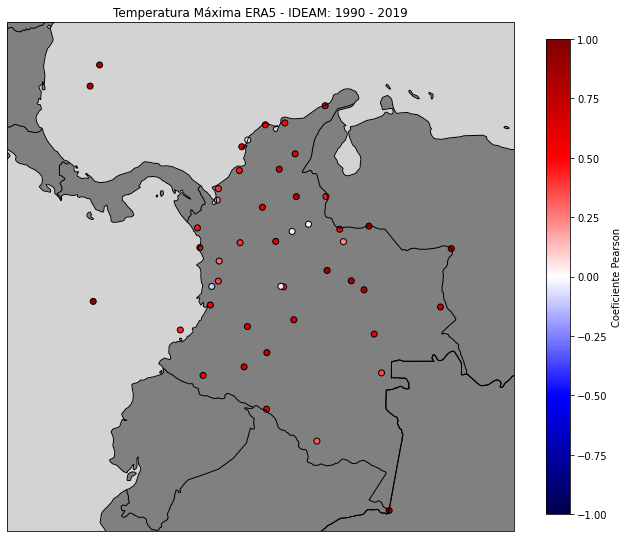

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(25,25))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Máxima ERA5 - IDEAM: 1990 - 2019')
im1 = ax.scatter(dtmax['lon'],dtmax['lat'],c=dtmax['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('TMax.pdf',dpi=300)
plt.show()

#**Mapa de diferencias de altura en m.s.n.m al restar altura IDEAM - ERA5**

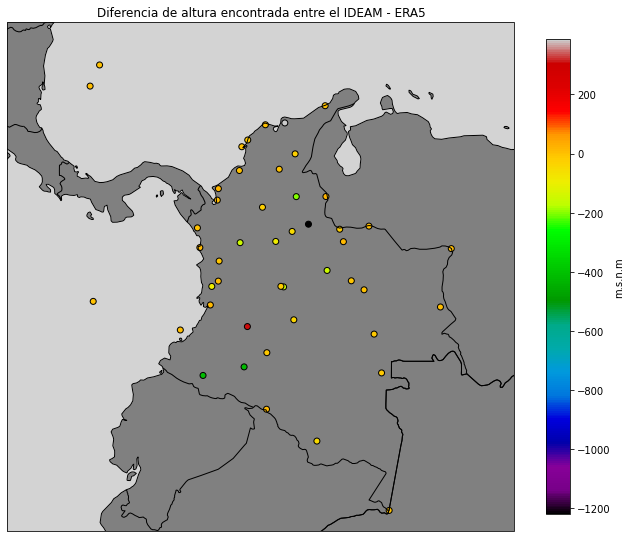

In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(25,25))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Diferencia de altura encontrada entre el IDEAM - ERA5')
im1 = ax.scatter(df['lon'],df['lat'],c=df['diff_altitud'],transform=ccrs.Geodetic(),cmap='nipy_spectral',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='m.s.n.m',shrink=0.35)
#plt.savefig('TMax.pdf',dpi=300)
plt.show()

#**Estaciones con mayores diferencias en grados entre el IDEAM y el punto del ERA5**

In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')
print('DESCENDIENTE\n----------------------------------------------')
display(df.sort_values(by='diff_altitud',ascending=False).head(5))
print('\nASCENDIENTE-----------------------------------------------')
display(df.sort_values(by='diff_altitud',ascending=True).head(5))

DESCENDIENTE
----------------------------------------------


Codigo                       Estacion        Departamento  \
32  15015060  SAN LORENZO  - AUT [15015060]           Magdalena   
1   21135050            JULIA LA [21135050]               Huila   
10  16015040        SANTA ISABEL [16015040]  Norte_de_Santander   
26  12025030          MELLITO EL [12025030]               Chocó   
13  47045010    PUERTO LEGUIZAMO [47045010]            Putumayo   

           Municipio  Identificador        lat  lat_E   dif_lat        lon  \
32       Santa_Marta              3  11.111083  11.00  0.111083 -74.054694   
1              Neiva              0   3.098778   3.00  0.098778 -75.530028   
10            Cucuta              0   8.233333   8.25  0.016667 -72.433333   
26           Necocli              3   8.542667   8.50  0.042667 -76.673361   
13  Puerto_Leguizamo              1  -0.180611  -0.25  0.069389 -74.776278   

    lon_E   dif_lon  diferencia  altitud_i  altitud_e  diff_altitud  
32 -74.00  0.054694    0.165778       2254       1866           388  
1  -75.50  0.030028    0.128806       1737       1427           310  
10 -72.50  0.066667    0.083333         90         67            23  
26 -76.75  0.076639    0.119306         52         30            22  
13 -74.75  0.026278    0.095667        191        175            16


ASCENDIENTE-----------------------------------------------


Codigo                 Estacion Departamento              Municipio  \
7   23195040           UIS [23195040]    Santander            Bucaramanga   
15  44035030      MACAGUAL [44035030]      Caquetá              Florencia   
0   52055210  BOTANA - AUT [52055210]       Nariño                  Pasto   
9   23215030  AGUAS CLARAS [23215030]        Cesar              Aguachica   
4   26215020   CANAFISANTO [26215020]    Antioquia  Santa_Fe_De_Antioquia   

    Identificador       lat  lat_E   dif_lat        lon  lon_E   dif_lon  \
7               0  7.144722   7.25  0.105278 -73.122222 -73.00  0.122222   
15              1  1.500000   1.50  0.000000 -75.660000 -75.75  0.090000   
0               0  1.160000   1.25  0.090000 -77.278806 -77.25  0.028806   
9               0  8.228889   8.25  0.021111 -73.602778 -73.50  0.102778   
4               0  6.416667   6.50  0.083333 -75.816667 -75.75  0.066667   

    diferencia  altitud_i  altitud_e  diff_altitud  
7     0.227500        898       2118         -1220  
15    0.090000        238        660          -422  
0     0.118806       2790       3204          -414  
9     0.123889        134        332          -198  
4     0.150000        551        702          -151

#**Peor estación en el desempeño por Pearson**

In [ ]:
print('----------------------------PRECIPITACIÓN',end='   \n')
display(dp.sort_values(by='corr',ascending=True).head(5))
print('----------------------------TEMPERATURA MÍNIMA',end='   \n')
display(dtmin.sort_values(by='corr',ascending=True).head(5))
print('----------------------------TEMPRATURA MÁXIMA',end='   \n')
display(dtmax.sort_values(by='corr',ascending=True).head(5))

----------------------------PRECIPITACIÓN   


Codigo                                     Estacion        Departamento  \
43  57015010                   MALPELO  - AUT  [57015010]     Valle_del_Cauca   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]           Santander   
18  31095030              PUERTO INIRIDA - AUT [31095030]             Guainía   
10  16015040                      SANTA ISABEL [16015040]  Norte_de_Santander   
21  54025010                   SAN JOSE PALMAR [54025010]               Chocó   

       Municipio  Identificador       lat        lon  prewhiten_p      corr  \
43  Buenaventura              5  4.096000 -81.608833    -0.321489  0.006445   
7    Bucaramanga              0  7.144722 -73.122222    -0.075271  0.074931   
18       Inirida              1  3.874417 -67.919056     0.591182  0.190636   
10        Cucuta              0  8.233333 -72.433333     0.126517  0.250940   
21        Novita              2  4.898083 -76.676667     0.195657  0.274860   

             mse      rmse  euclidean   entropy     slope  intercept    stderr  
43  106756.73408  326.7360  2191.8150  2.484202  0.012461   284.4770  0.294840  
7   495417.60000  703.8590  8504.7610  0.252820  0.443000   679.4500  0.491200  
18   51942.30300  227.9085  4158.9406  0.287660  0.093040   150.2690  0.026334  
10   22240.34880  149.1319  1947.2160  0.175587  0.221299   226.0435  0.077925  
21  211580.68600  459.9790  8393.8290  0.112220  0.497900   551.4130  0.095736

----------------------------TEMPERATURA MÍNIMA   


Codigo                      Estacion     Departamento  \
43  57015010    MALPELO  - AUT  [57015010]  Valle_del_Cauca   
44  14015060  ISLAS DEL ROSARIO [14015060]          Bolívar   
39  36025010               TAME [36025010]           Arauca   
23  56015010       PANAMERICANA [56015010]            Chocó   
19  54075020        BAJO CALIMA [54075020]  Valle_del_Cauca   

              Municipio  Identificador        lat        lon      corr  \
43         Buenaventura              5   4.096000 -81.608833 -0.630940   
44  Cartagena_De_Indias              5  10.183333 -75.750000 -0.354359   
39                 Tame              4   6.456194 -71.745028 -0.208320   
23         Bahia_Solano              2   6.223333 -77.404444 -0.195097   
19         Buenaventura              2   3.953556 -76.990444 -0.180110   

          mse     rmse  euclidean   entropy    slope  intercept    stderr  
43  28.901000  5.37600   10.75201  0.002162 -0.17233    28.1550  0.149840  
44  17.571660  4.19180   22.18100  0.007967 -0.04434    26.0940  0.022950  
39   3.832550  1.95760   31.13900  0.004896 -0.08257    21.6590  0.024469  
23  15.819500  3.97737   70.14170  0.002643 -0.07190    25.4190  0.020587  
19   2.364345  1.53764   26.98550  0.002261 -0.12610    26.8799  0.039384

----------------------------TEMPRATURA MÁXIMA   


Codigo                                     Estacion  Departamento  \
20  54085010                           NOANAMA [54085010]         Chocó   
7   23195040  UNIVERSIDAD INDUSTRIAL SANTANDER [23195040]     Santander   
6   23155040                         CENTRO EL [23155040]     Santander   
30  14015030                ESCUELA NAVAL CIOH [14015030]       Bolívar   
3   21205420                         TIBAITATA [21205420]  Cundinamarca   

              Municipio  Identificador        lat        lon      corr  \
20       Medio_San_Juan              2   4.688190 -76.934250 -0.108158   
7           Bucaramanga              0   7.144722 -73.122222 -0.010246   
6       Barrancabermeja              0   6.859556 -73.765083  0.022974   
30  Cartagena_De_Indias              3  10.447222 -75.516111  0.052071   
3              Mosquera              0   4.691417 -74.209000  0.055529   

           mse       rmse   euclidean   entropy     slope  intercept    stderr  
20    5.111309   2.260800   40.442787  0.002565 -0.051529   33.58270  0.026560  
7    74.617110   8.838110  104.731000  0.002082 -0.005864   21.83340  0.047529  
6   128.695100  11.344400  170.920880  0.001985  0.033500   31.69030  0.097190  
30    3.089978   1.757833   19.495300  0.000846  0.051219   29.80635  0.089301  
3     3.833689   1.957980   36.630440  0.033010  0.060760   21.45520  0.058564

#**Mejores estaciones para cada variable por Pearson**

In [ ]:
print('----------------------------PRECIPITACIÓN',end='   \n')
display(dp.sort_values(by='corr',ascending=False).head(5))
print('----------------------------TEMPERATURA MÍNIMA',end='   \n')
display(dtmin.sort_values(by='corr',ascending=False).head(5))
print('----------------------------TEMPRATURA MÁXIMA',end='   \n')
display(dtmax.sort_values(by='corr',ascending=False).head(5))

----------------------------PRECIPITACIÓN   


Codigo                               Estacion Departamento  \
38  38015030   AEROPUERTO PUERTO CARRENO [38015030]      Vichada   
31  29045120                  FLORES LAS [29045120]    Atlántico   
36  35225030               MODULOS - AUT [35225030]         Meta   
41  37055010  AEROPUERTO SANTIAGO PÃ‰REZ [37055010]       Arauca   
35  34015010                LAS GAVIOTAS [34015010]       Arauca   

         Municipio  Identificador        lat        lon  prewhiten_p  \
38  Puerto_Carreno              4   6.182436 -67.491222     0.382659   
31    Barranquilla              3  11.040000 -74.820833     0.626016   
36          Orocue              4   4.910472 -71.433056     0.453528   
41          Arauca              4   7.069444 -70.738056     0.315525   
35        Cumaribo              4   4.553944 -70.930111     0.445640   

        corr         mse      rmse   euclidean   entropy    slope  intercept  \
38  0.838076  10187.4000  100.9320  1915.06240  0.101732  0.63806   71.70100   
31  0.831249   6378.6168   79.8662  1331.63639  0.232938  1.05870   44.41122   
36  0.817510   6652.8370   81.5649  1497.33300  0.088791  0.71538   50.21960   
41  0.816320   9162.9670   95.7210  1816.19400  0.116380  0.93588   59.92707   
35  0.808204   9351.2650   96.7010  1829.68300  0.072707  0.61808   57.99290   

      stderr  
38  0.021951  
31  0.042619  
36  0.027534  
41  0.034970  
35  0.023861

----------------------------TEMPERATURA MÍNIMA   


Codigo                              Estacion  Departamento  \
11  48015050    AEROPUERTO VASQUEZ COBO [48015050]      Amazonas   
13  47045010           PUERTO LEGUIZAMO [47045010]      Putumayo   
0   52055210               BOTANA - AUT [52055210]        Nariño   
38  38015030  AEROPUERTO PUERTO CARRENO [38015030]       Vichada   
3   21205420                  TIBAITATA [21205420]  Cundinamarca   

           Municipio  Identificador       lat        lon      corr        mse  \
11           Leticia              1 -4.193861 -69.940917  0.911161   2.450280   
13  Puerto_Leguizamo              1 -0.180611 -74.776278  0.607195   0.807359   
0              Pasto              0  1.160000 -77.278806  0.561710   5.042700   
38    Puerto_Carreno              4  6.182436 -67.491222  0.546905   1.448730   
3           Mosquera              0  4.691417 -74.209000  0.519576  57.396900   

        rmse  euclidean   entropy     slope  intercept    stderr  
11  1.565300   28.30620  0.000842  0.680400    7.93537  0.017060  
13  0.898531   15.16890  0.000809  0.593864    8.78240  0.049194  
0   2.245600   40.66960  0.014265  0.448050    5.31880  0.036550  
38  1.203632   22.32404  0.000689  0.403210   14.06090  0.033370  
3   7.576070  141.32999       inf  0.250680    9.30622  0.022614

----------------------------TEMPRATURA MÁXIMA   


Codigo                               Estacion     Departamento  \
43  57015010             MALPELO  - AUT  [57015010]  Valle_del_Cauca   
37  35215020      AEROPUERTO YOPAL - AUT [35215020]         Casanare   
38  38015030   AEROPUERTO PUERTO CARRENO [38015030]          Vichada   
41  37055010  AEROPUERTO SANTIAGO PÃ‰REZ [37055010]           Arauca   
36  35225030               MODULOS - AUT [35225030]             Meta   

         Municipio  Identificador       lat        lon      corr       mse  \
43    Buenaventura              5  4.096000 -81.608833  0.912110  8.196500   
37           Yopal              4  5.320444 -72.387500  0.867870  7.929730   
38  Puerto_Carreno              4  6.182436 -67.491222  0.849880  3.732080   
41          Arauca              4  7.069444 -70.738056  0.834942  1.579260   
36          Orocue              4  4.910472 -71.433056  0.832520  3.011519   

       rmse  euclidean   entropy     slope  intercept    stderr  
43  2.86290    5.71590  0.000500  0.419060  14.833310  0.133170  
37  2.81590   46.44231  0.000533  1.116670  -6.571630  0.038900  
38  1.93180   35.83060  0.000383  0.945880   0.263465  0.031700  
41  1.25660   23.34195  0.000436  0.955490   0.771308  0.034005  
36  1.73537   31.52460  0.000404  0.893131   2.208330  0.032811

In [ ]:
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
#INICIO
df = pd.read_excel('Libro_estaciones.xlsx')

#Región Andina
andina = df.loc[df['Identificador']==0]
lat_andina,lon_andina = andina['lat'],andina['lon']
lat_eandina,lon_eandina = andina['lat_E'],andina['lon_E']
alt_ai = andina['altitud_i']
alt_ae = andina['altitud_e']
andina_ = andina['Estacion']

#Región Amazonía
amazonia = df.loc[df['Identificador']==1]
lat_amazonia,lon_amazonia = amazonia['lat'],amazonia['lon']
lat_eamazonia,lon_eamazonia = amazonia['lat_E'],amazonia['lon_E']
alt_ami = amazonia['altitud_i']
alt_ame = amazonia['altitud_e']
amazonia_ = amazonia['Estacion']

#Región Pacífica
pacifica = df.loc[df['Identificador']==2]
lat_pacifica,lon_pacifica = pacifica['lat'],pacifica['lon']
lat_epacifica,lon_epacifica = pacifica['lat_E'],pacifica['lon_E']
alt_pi = pacifica['altitud_i']
alt_pe = pacifica['altitud_e']
pacifica_ = pacifica['Estacion']

#Región Caribe
caribe = df.loc[df['Identificador']==3]
lat_caribe,lon_caribe = caribe['lat'],caribe['lon']
lat_ecaribe,lon_ecaribe = caribe['lat_E'],caribe['lon_E']
alt_ci = caribe['altitud_i']
alt_ce = caribe['altitud_e']
caribe_ = caribe['Estacion']

#Región Orinoquía
orinoquia = df.loc[df['Identificador']==4]
lat_orinoquia,lon_orinoquia = orinoquia['lat'],orinoquia['lon']
lat_eorinoquia,lon_eorinoquia = orinoquia['lat_E'],orinoquia['lon_E']
alt_oi = orinoquia['altitud_i']
alt_oe = orinoquia['altitud_e']
orinoquia_ = orinoquia['Estacion']

#Región Insular
insular = df.loc[df['Identificador']==5]
lat_insular,lon_insular = insular['lat'],insular['lon']
lat_einsular,lon_einsular = insular['lat_E'],insular['lon_E']
alt_ii = insular['altitud_i']
alt_ie = insular['altitud_e']
insular_= insular['Estacion']

#Precipitación:
df = pd.read_excel('Libro_estaciones.xlsx',sheet_name='P')
#Región Andina
andina = df.loc[df['Identificador']==0]
and_cp = andina['corr']

#Región Amazonía
amazonia = df.loc[df['Identificador']==1]
ama_cp = amazonia['corr']

#Región Pacífica
pacifica = df.loc[df['Identificador']==2]
pac_cp = pacifica['corr']

#Región Caribe
caribe = df.loc[df['Identificador']==3]
car_cp = caribe['corr']

#Región Orinoquía
orinoquia = df.loc[df['Identificador']==4]
ori_cp = orinoquia['corr']

#Región Insular
insular = df.loc[df['Identificador']==5]
ins_cp = insular['corr']

#TMínima:

df = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMin')
#Región Andina
andina = df.loc[df['Identificador']==0]
and_cmin = andina['corr']

#Región Amazonía
amazonia = df.loc[df['Identificador']==1]
ama_cmin = amazonia['corr']

#Región Pacífica
pacifica = df.loc[df['Identificador']==2]
pac_cmin = pacifica['corr']

#Región Caribe
caribe = df.loc[df['Identificador']==3]
car_cmin = caribe['corr']

#Región Orinoquía
orinoquia = df.loc[df['Identificador']==4]
ori_cmin = orinoquia['corr']

#Región Insular
insular = df.loc[df['Identificador']==5]
ins_cmin = insular['corr']

#TMáxima:

df = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMax')
#Región Andina
andina = df.loc[df['Identificador']==0]
and_cmax = andina['corr']

#Región Amazonía
amazonia = df.loc[df['Identificador']==1]
ama_cmax = amazonia['corr']

#Región Pacífica
pacifica = df.loc[df['Identificador']==2]
pac_cmax = pacifica['corr']

#Región Caribe
caribe = df.loc[df['Identificador']==3]
car_cmax = caribe['corr']

#Región Orinoquía
orinoquia = df.loc[df['Identificador']==4]
ori_cmax = orinoquia['corr']

#Región Insular
insular = df.loc[df['Identificador']==5]
ins_cmax = insular['corr']

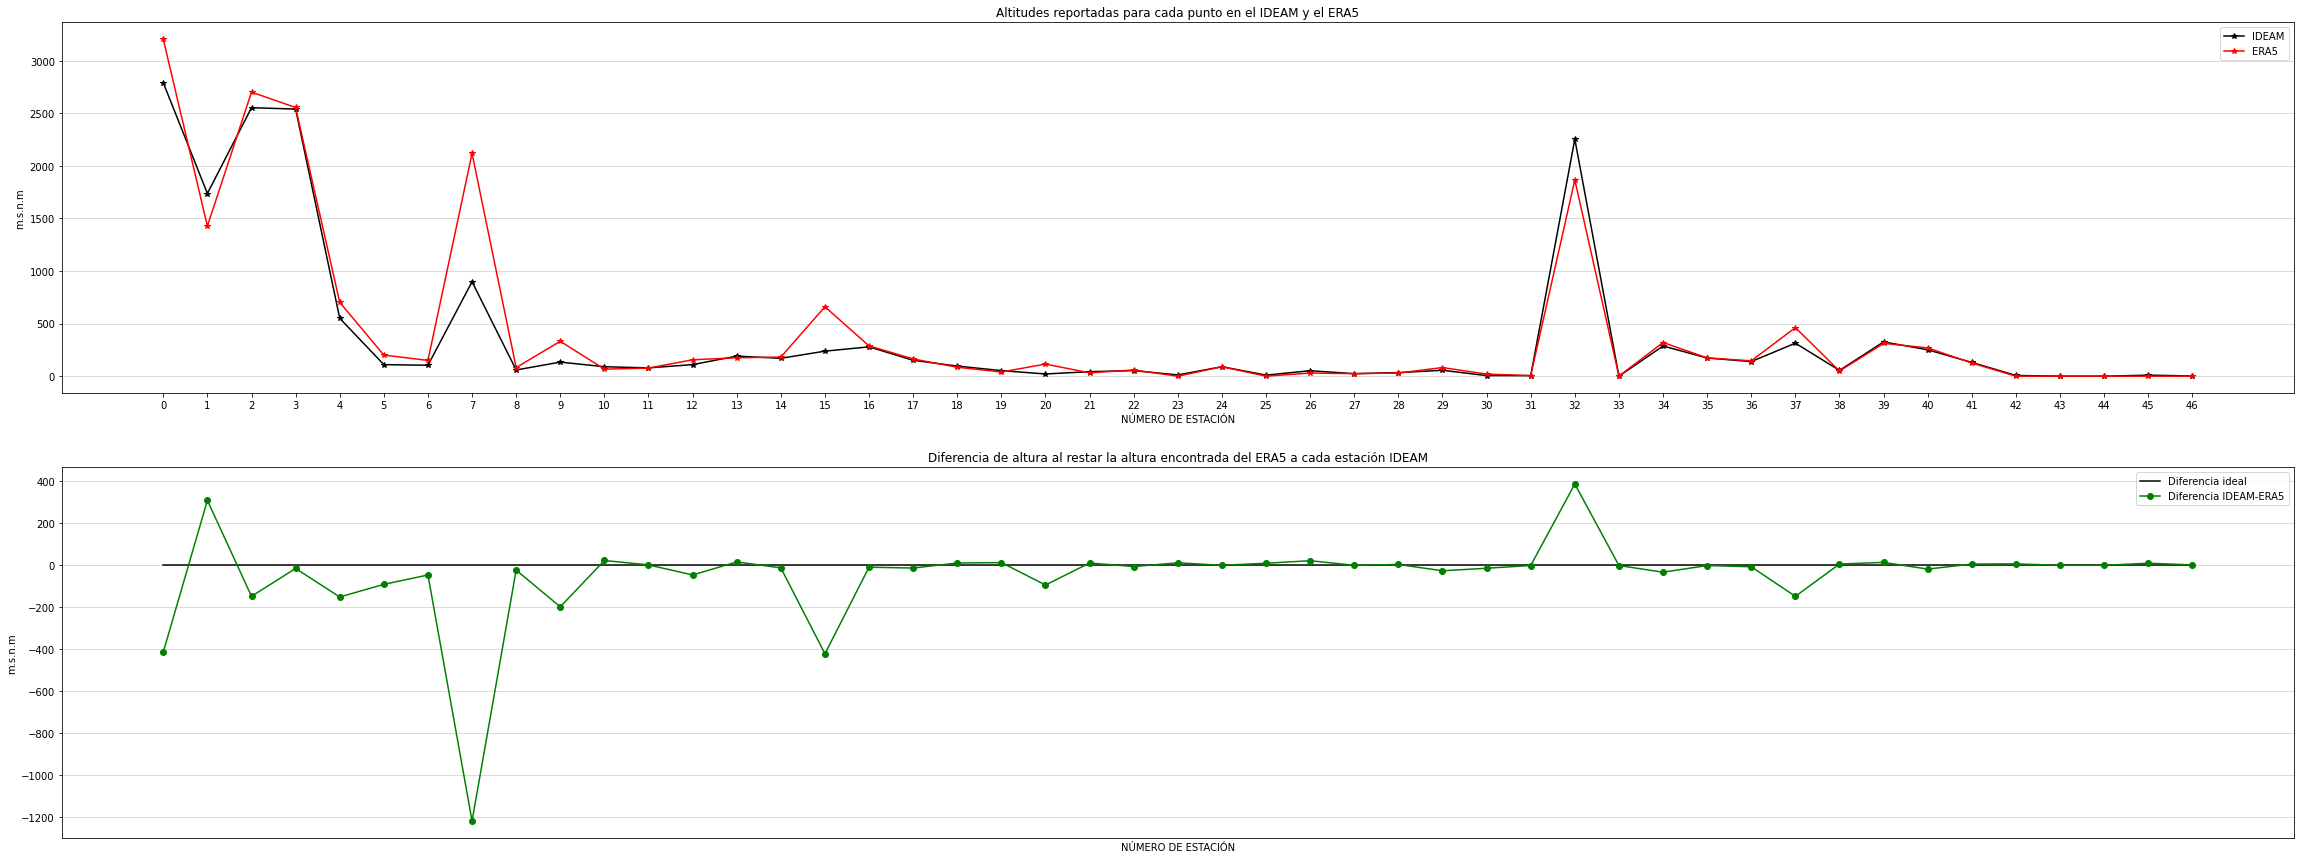

In [ ]:
df=pd.read_excel('Libro_estaciones.xlsx')
numero = []
for i in range(0,len(df['Estacion'])):
  numero.append(i)
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(40,15))
ax.plot(range(0,len(df['Estacion'])),df['altitud_i'],linestyle='-',marker='*',color='black',label='IDEAM')
ax.plot(range(0,len(df['Estacion'])),df['altitud_e'],linestyle='-',marker='*',color='red',label='ERA5')
ax.set_xticks(numero)
ax.set_ylabel('m.s.n.m')
ax.set_xlabel('NÚMERO DE ESTACIÓN')
ax.grid(color='lightgrey',axis='y')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5')
ax.legend()
#--1
ax1.plot(range(0,len(df['Estacion'])),np.zeros(47),color='black',linestyle='solid',label='Diferencia ideal')
ax1.plot(df['Estacion'],df['diff_altitud'],color='green',marker='o',linestyle='solid',label='Diferencia IDEAM-ERA5')
ax1.set_title('Diferencia de altura al restar la altura encontrada del ERA5 a cada estación IDEAM')
ax1.set_ylabel('m.s.n.m')
ax1.set_xlabel('NÚMERO DE ESTACIÓN')
ax1.grid(color='lightgrey',axis='y')
ax1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax1.legend()

ANDINA
--------------------------------------------------------------------------------------------------


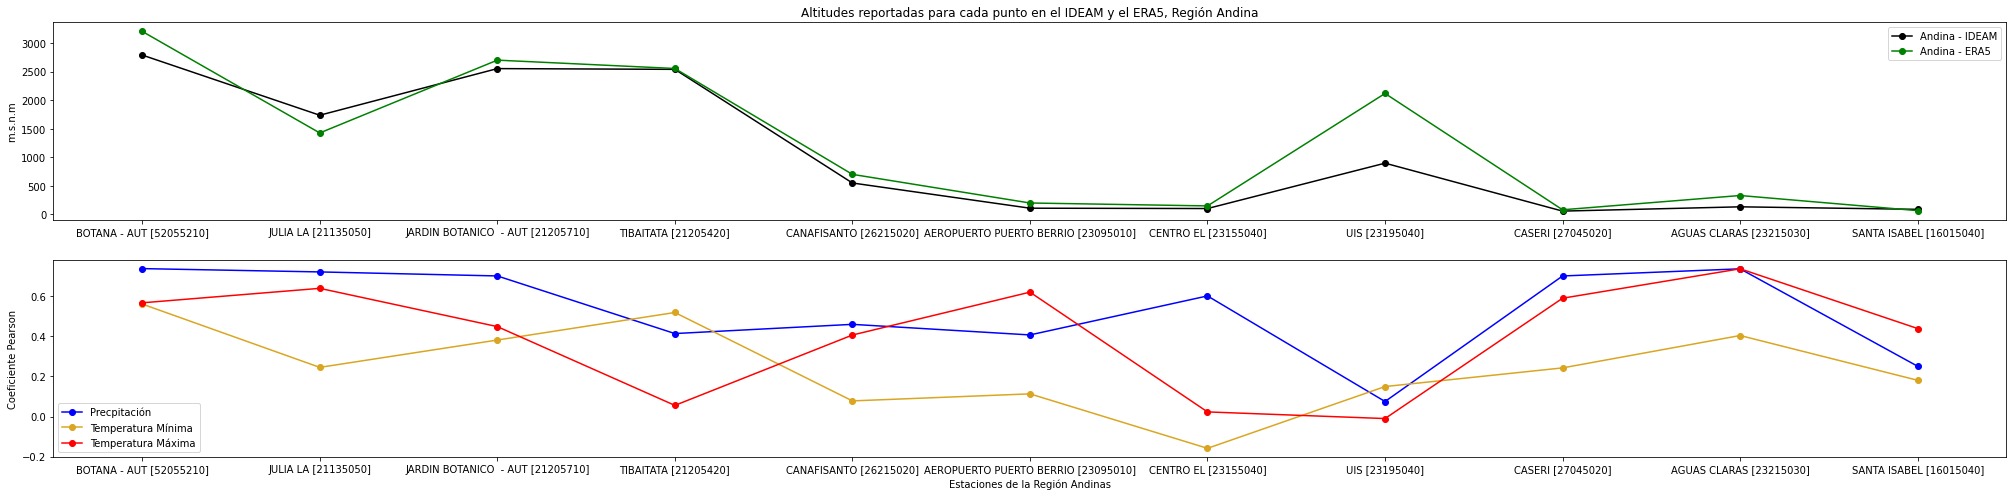

In [ ]:
#-ANDINA
print('ANDINA')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(andina_,alt_ai,label='Andina - IDEAM',color='black',marker='o')
ax.plot(andina_,alt_ae,label='Andina - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Andina')
ax1.plot(andina_,and_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(andina_,and_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(andina_,and_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Andinas')
ax1.legend()
print('--------------------------------------------------------------------------------------------------')

AMAZONÍA


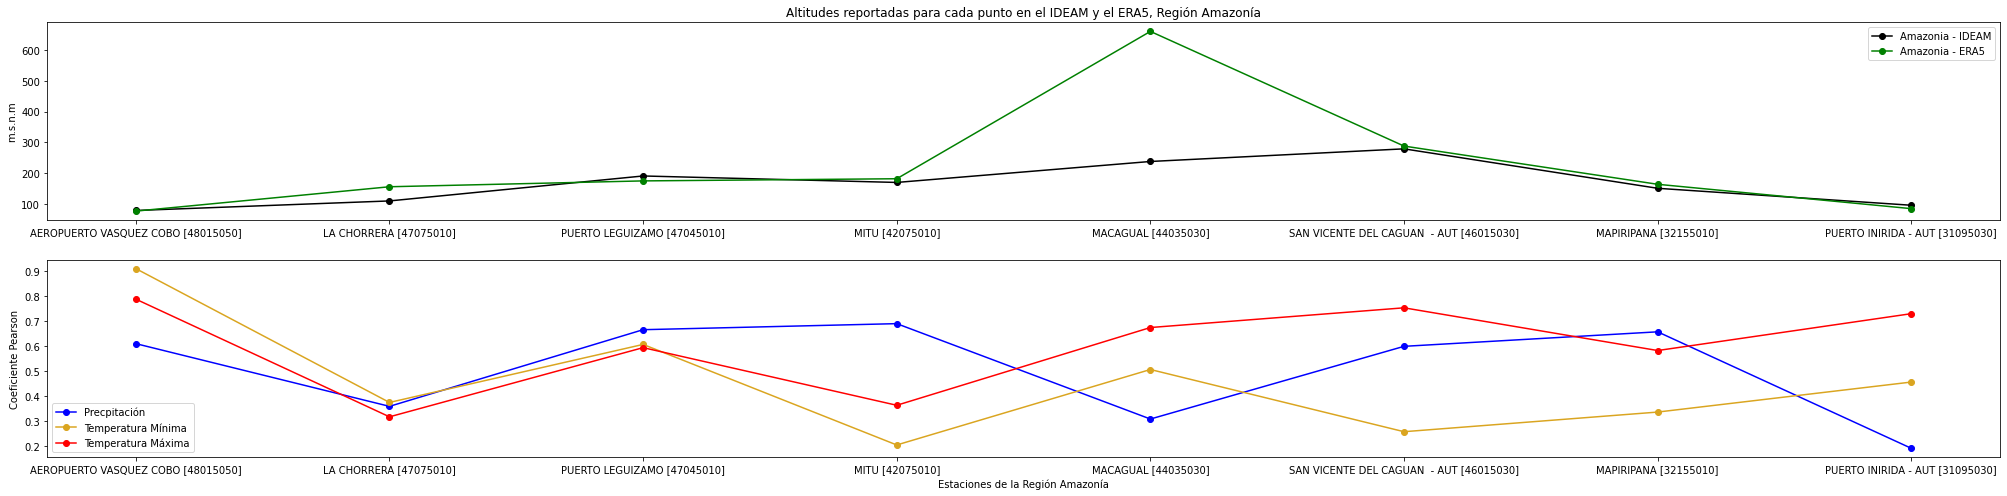

In [ ]:
# #-AMAZONÍA
print('AMAZONÍA')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(amazonia_,alt_ami,label='Amazonia - IDEAM',color='black',marker='o')
ax.plot(amazonia_,alt_ame,label='Amazonia - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Amazonía')
ax1.plot(amazonia_,ama_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(amazonia_,ama_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(amazonia_,ama_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Amazonía')
ax1.legend()

PACÍFICA


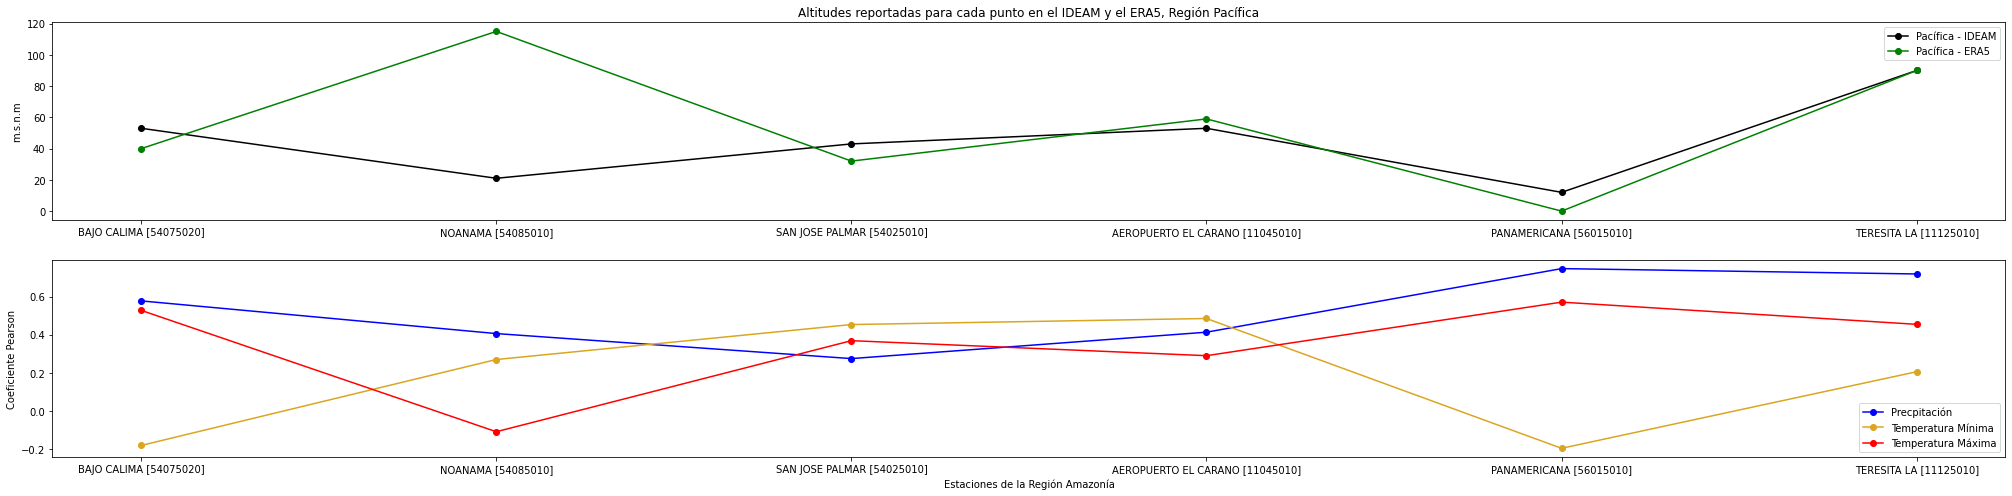

In [ ]:
# #-PACÍFICA
print('PACÍFICA')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(pacifica_,alt_pi,label='Pacífica - IDEAM',color='black',marker='o')
ax.plot(pacifica_,alt_pe,label='Pacífica - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Pacífica')
ax1.plot(pacifica_,pac_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(pacifica_,pac_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(pacifica_,pac_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Amazonía')
ax1.legend()

CARIBE
--------------------------------------------------------------------------------------------------


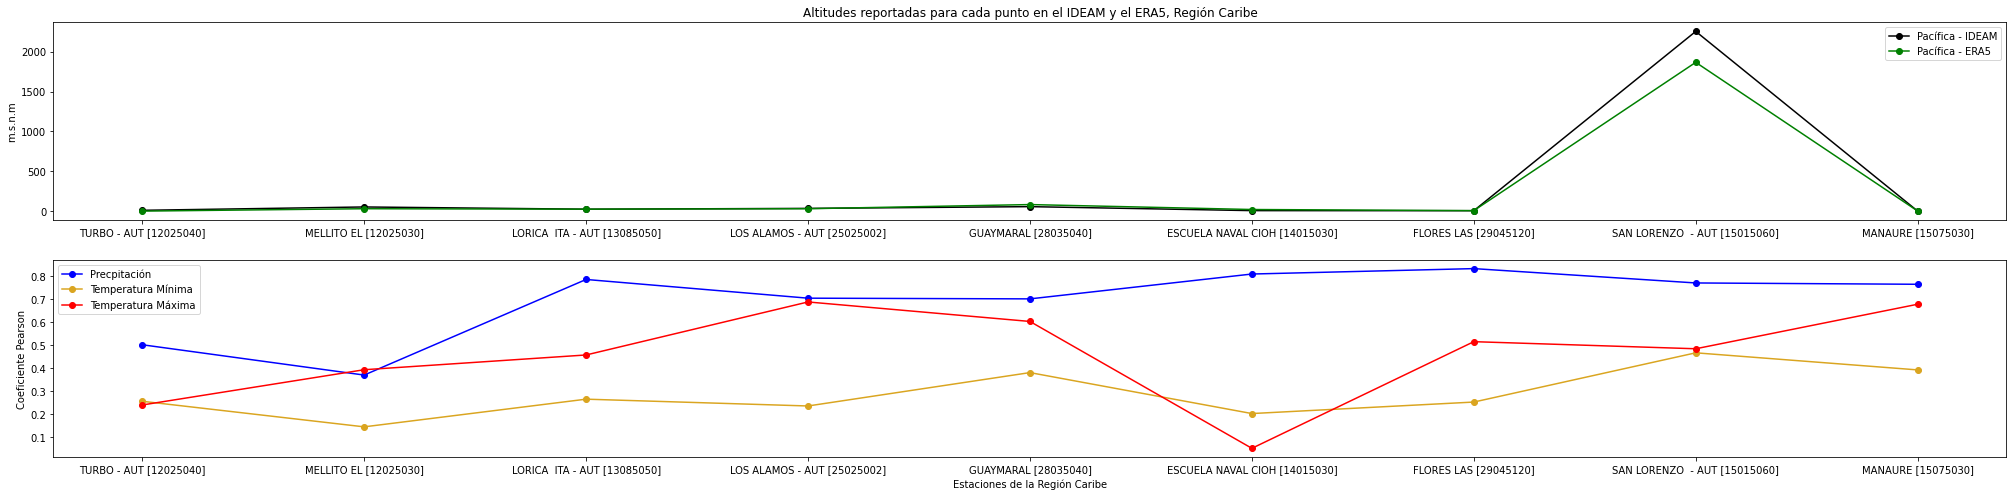

In [ ]:
# #-CARIBE
print('CARIBE')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(caribe_,alt_ci,label='Pacífica - IDEAM',color='black',marker='o')
ax.plot(caribe_,alt_ce,label='Pacífica - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Caribe')
ax1.plot(caribe_,car_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(caribe_,car_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(caribe_,car_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Caribe')
ax1.legend()


print('--------------------------------------------------------------------------------------------------')

CARIBE
--------------------------------------------------------------------------------------------------


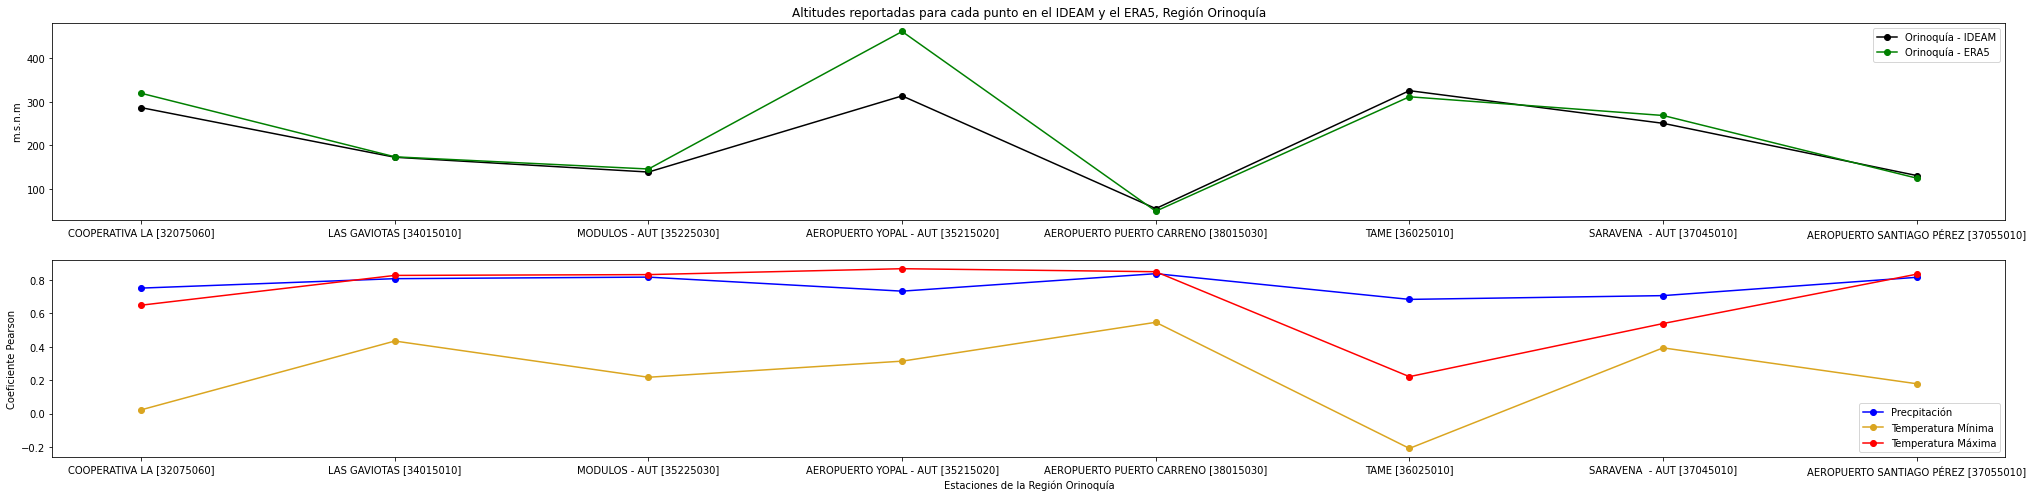

In [ ]:
# #-ORINOQUÍA
print('CARIBE')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(orinoquia_,alt_oi,label='Orinoquía - IDEAM',color='black',marker='o')
ax.plot(orinoquia_,alt_oe,label='Orinoquía - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Orinoquía')
ax1.plot(orinoquia_,ori_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(orinoquia_,ori_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(orinoquia_,ori_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Orinoquía')
ax1.legend()
print('--------------------------------------------------------------------------------------------------')

INSULAR


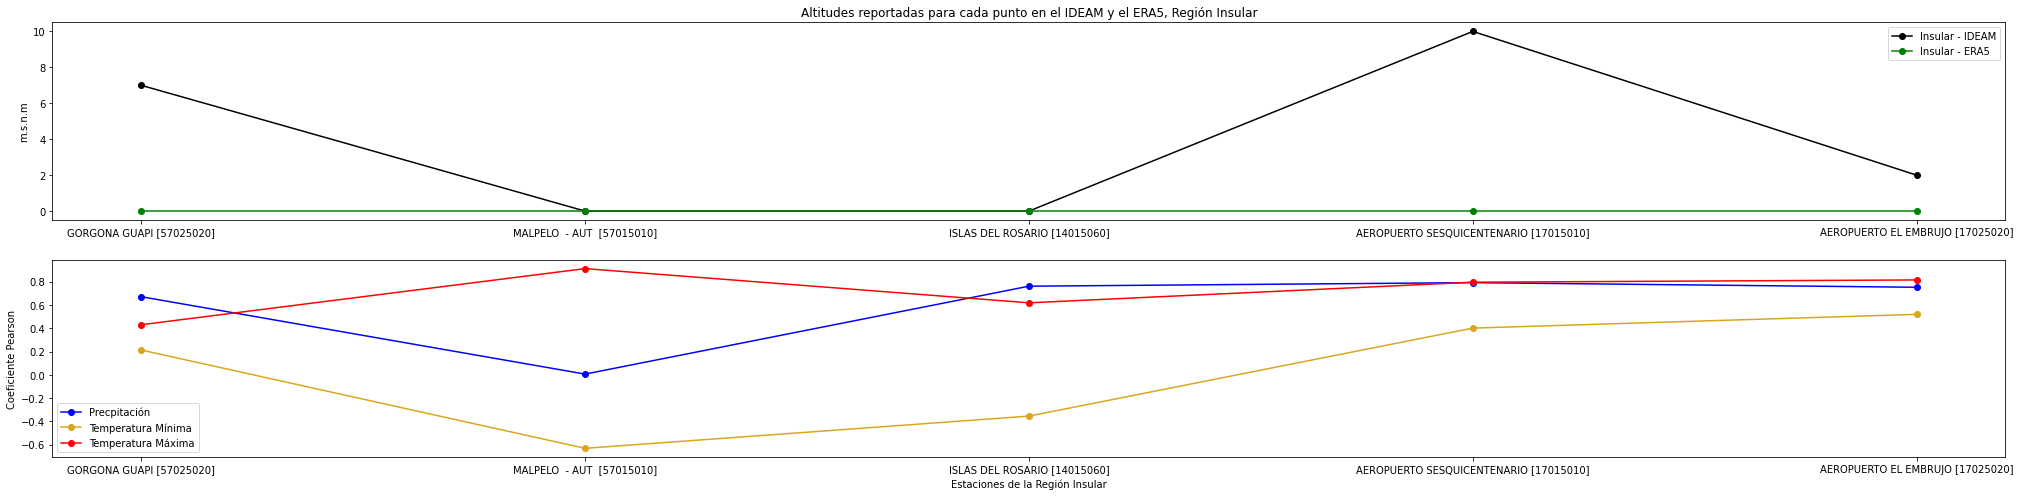

In [ ]:
# #-INSULAR
print('INSULAR')
fig,(ax,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(35,8))
ax.plot(insular_,alt_ii,label='Insular - IDEAM',color='black',marker='o')
ax.plot(insular_,alt_ie,label='Insular - ERA5',color='green',marker='o')
ax.legend()
ax.set_ylabel('m.s.n.m')
ax.set_title('Altitudes reportadas para cada punto en el IDEAM y el ERA5, Región Insular')
ax1.plot(insular_,ins_cp,marker='o',linestyle='solid',color='blue',label='Precpitación')
ax1.plot(insular_,ins_cmin,marker='o',linestyle='solid',color='goldenrod',label='Temperatura Mínima')
ax1.plot(insular_,ins_cmax,marker='o',linestyle='solid',color='red',label='Temperatura Máxima')
ax1.set_ylabel('Coeficiente Pearson')
ax1.set_xlabel('Estaciones de la Región Insular')
ax1.legend()

#**Prueba Gaussiana**

In [ ]:
def gauss(estacion):
  #INICIAL
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = str(df['NombreEstacion'][0])
  print('ESTACIÓN '+name)
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  fera = df['Fera']
  yfera = np.zeros(360)
  #-P
  df = pd.read_excel(estacion,sheet_name='P')
  df['Fecha'] = pd.to_datetime(df['Fecha'],format='%Y-%m')
  tiempo = df['Fecha']
  tiempo_p = range(0,len(df['Fecha']))
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20, 8))
  #Plots
  ax1.plot(tiempo,df['Diff'],'o',color='dimgray',linestyle='-')
  ax1.plot(fera,yfera,linestyle='-',color='black',label='Diferencia ideal')
  ax1.set_ylabel('Diferencia en la Precipitación, (mm)')
  ax1.set_xlabel('Año')
  ax1.set_title('Diferencia en la Precipitación IDEAM - ERA5, Estación '+name)
  ax1.legend(loc='upper right')
  ax2.hist(df['Diff'],edgecolor='black',color='white',bins=15,orientation='horizontal')
  ax2.set_xlabel('Frecuencia')
  ax2.set_ylabel('Diferencia')
  ax2.set_title('Histograma de diferencia de la precipitación')
  plt.savefig('A1'+name+'.pdf',dpi=200)
  plt.show()

  #TMín
  df = pd.read_excel(estacion,sheet_name='TMin')
  df['Fecha_Minima'] = pd.to_datetime(df['Fecha_Minima'],format='%Y-%m')
  tiempo = df['Fecha_Minima']
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20, 8))
  #Plots
  ax1.plot(tiempo,df['Diff'],'o',color='dimgray',linestyle='-')
  ax1.plot(fera,yfera,linestyle='-',color='black',label='Diferencia ideal')
  ax1.set_ylabel('Diferencia en la Temperatura, (°C)')
  ax1.set_xlabel('Año')
  ax1.legend(loc='upper right')
  ax1.set_title('Diferencia en la Temperatura Mínima IDEAM - ERA5, Estación '+name)
  ax2.hist(df['Diff'],edgecolor='black',color='white',bins=15,orientation='horizontal')
  ax2.set_xlabel('Frecuencia')
  ax2.set_ylabel('Diferencia')
  ax2.set_title('Histograma de diferencia de la Temperatura Mínima')
  plt.savefig('A2'+name+'.pdf',dpi=200)
  plt.show()
  # #T Máx
  df = pd.read_excel(estacion,sheet_name='TMax')
  df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'],format='%Y-%m')
  tiempo = df['Fecha_Maxima']
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20, 8))
  #Plots
  ax1.plot(tiempo,df['Diff'],'o',color='dimgray',linestyle='-')
  ax1.plot(fera,yfera,linestyle='-',color='black',label='Diferencia ideal')
  ax1.set_ylabel('Diferencia en la Temperatura, (°C)')
  ax1.set_xlabel('Año')
  ax1.legend(loc='upper right')
  ax1.set_title('Diferencia en la Temperatura Máxima IDEAM - ERA5, Estación '+name)
  ax2.hist(df['Diff'],edgecolor='black',color='white',bins=15,orientation='horizontal')
  ax2.set_xlabel('Frecuencia')
  ax2.set_ylabel('Diferencia')
  ax2.set_title('Histograma de diferencia de la Temperatura Máxima')
  plt.savefig('A3'+name+'.pdf',dpi=200)
  plt.show()
  print('\n----------------------------------------------------------------------------------------------------------------------------------------------------------------')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
ESTACIÓN AEROPUERTO SANTIAGO PÉREZ [37055010]


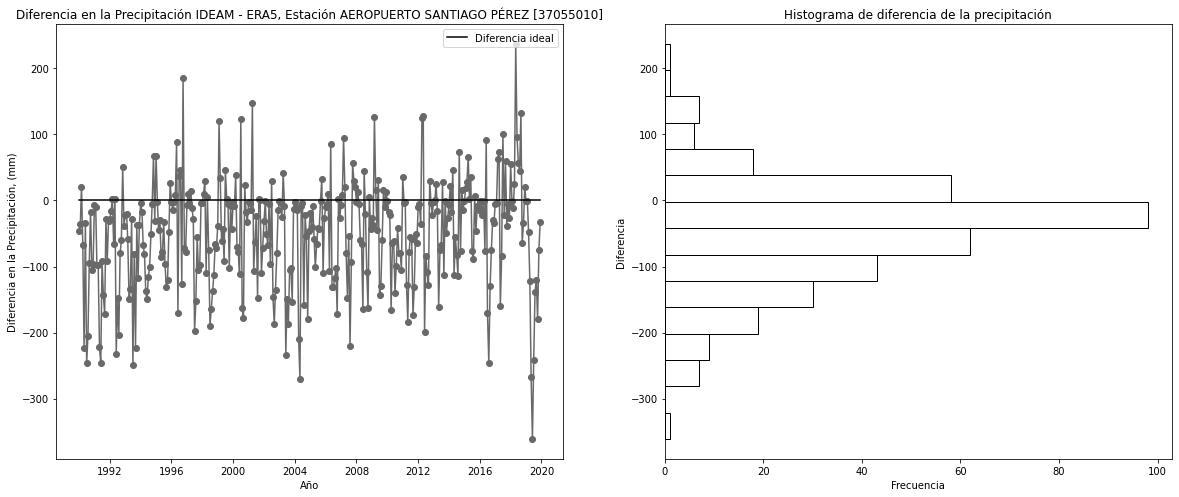

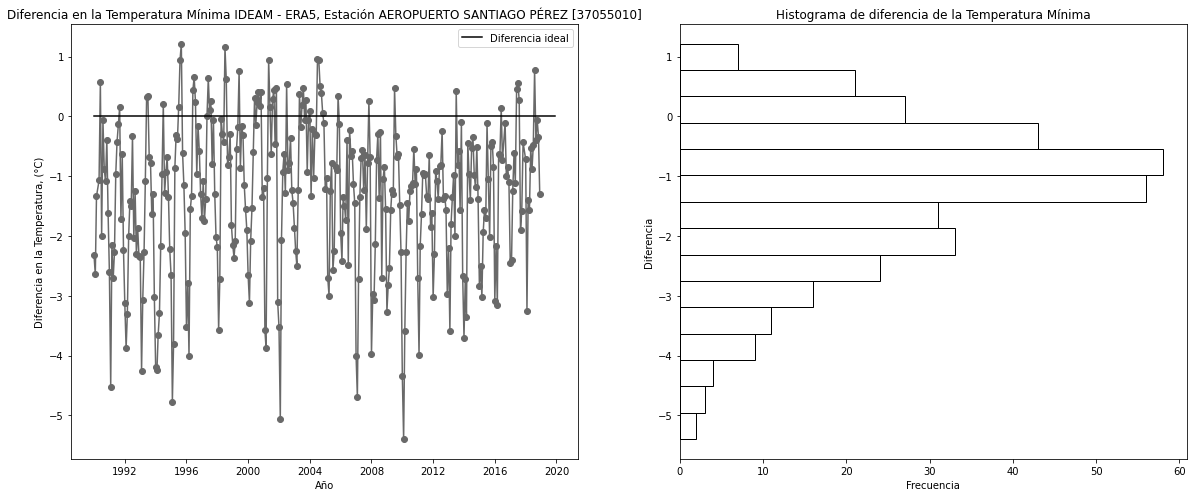

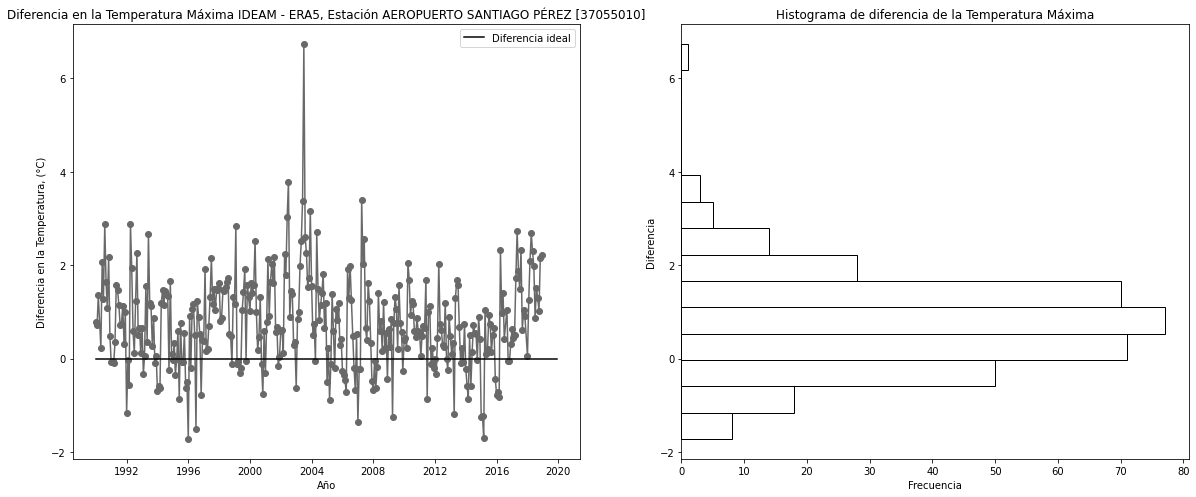


----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
gauss('ASantiagoPerez_1990-2019.xlsx')

In [ ]:
gauss('AguasClaras_1990-2019.xlsx')
gauss('APuertoBerrio_1990-2019.xlsx')
gauss('Botana_1990-2019.xlsx')
gauss('Caseri_1990-2019.xlsx')
gauss('ElCentro_1990-2019.xlsx')
gauss('JardinBotanico_1990-2019.xlsx')
gauss('LaJulia_1990-2019.xlsx')
gauss('Tibaitata_1990-2019.xlsx')
gauss('UIS_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA


ESTACIÓN LA CHORRERA [47075010]


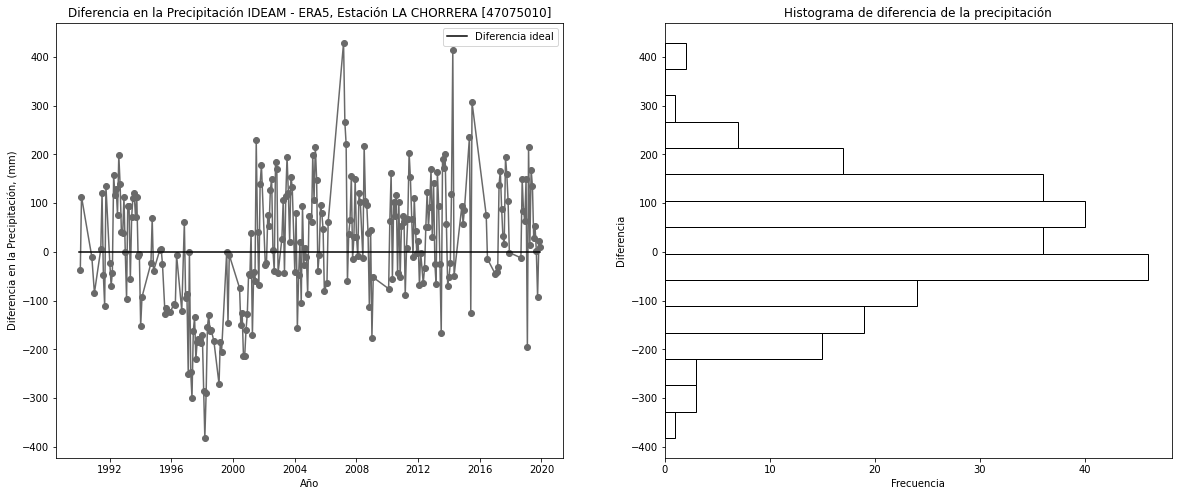

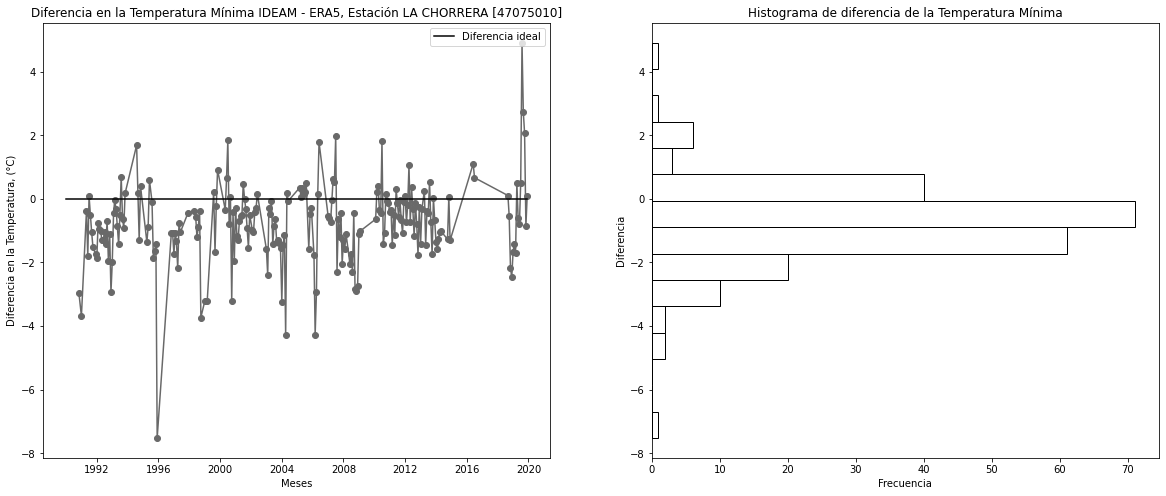

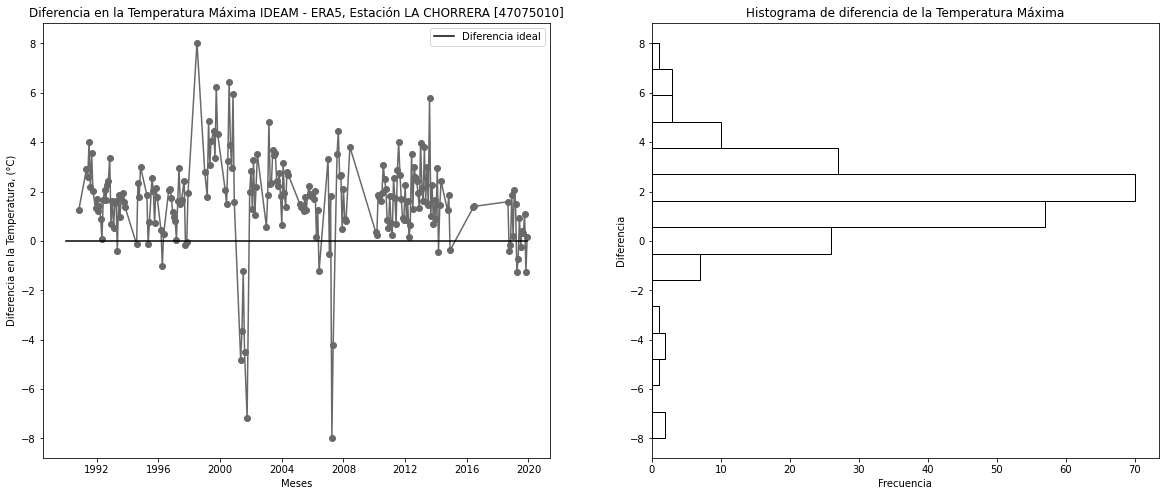


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN AEROPUERTO VASQUEZ COBO [48015050]


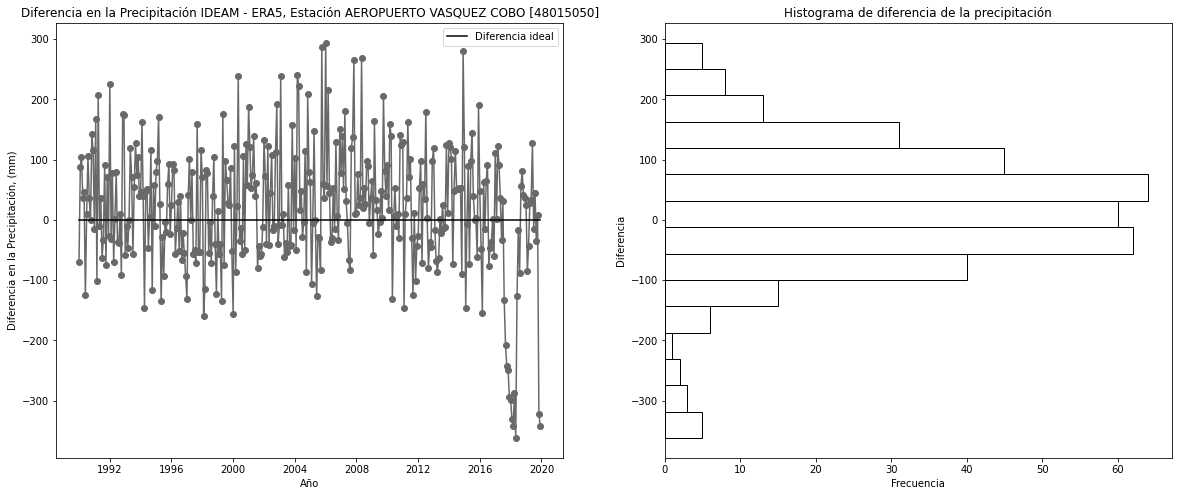

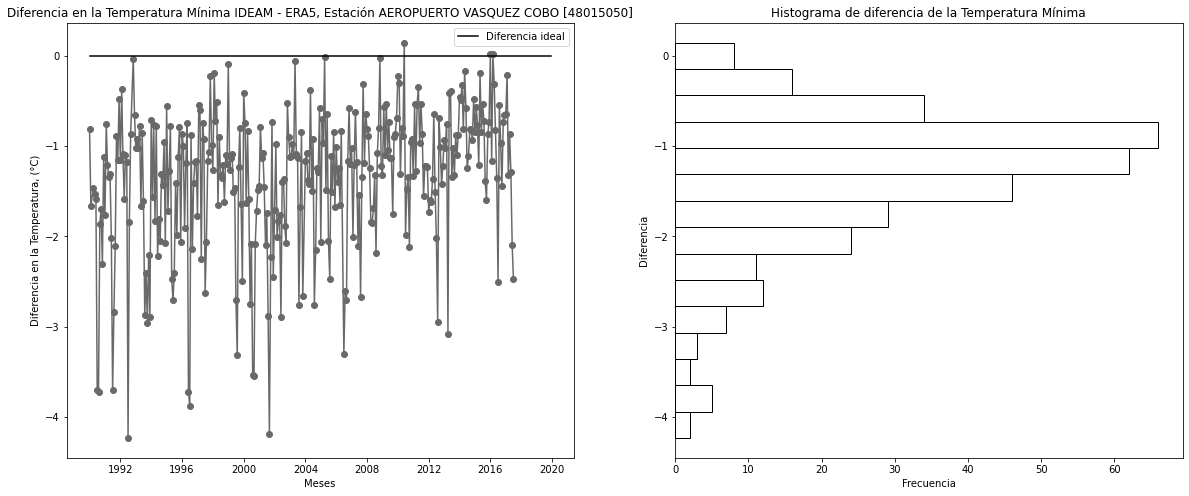

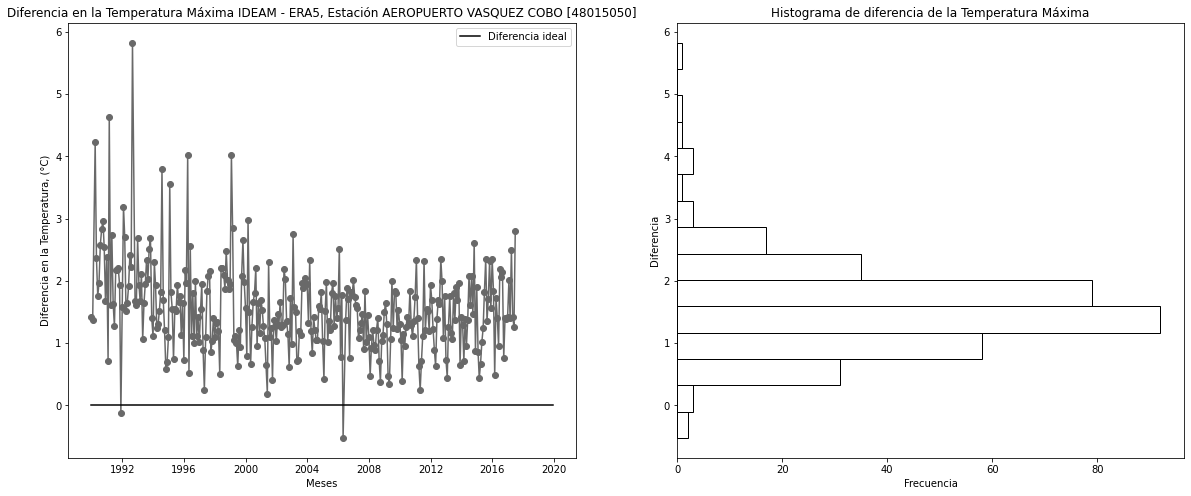


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN MACAGUAL [44035030]


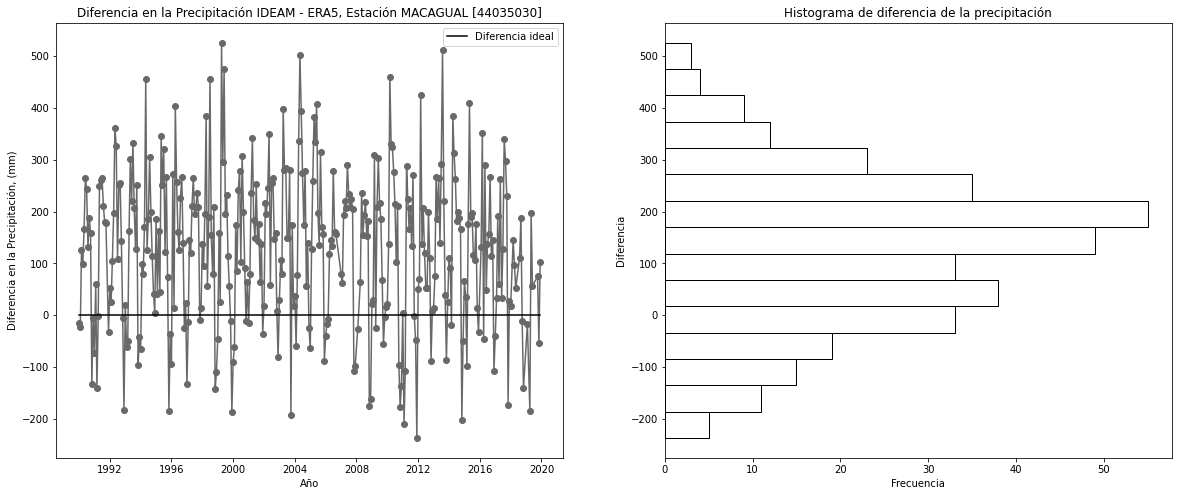

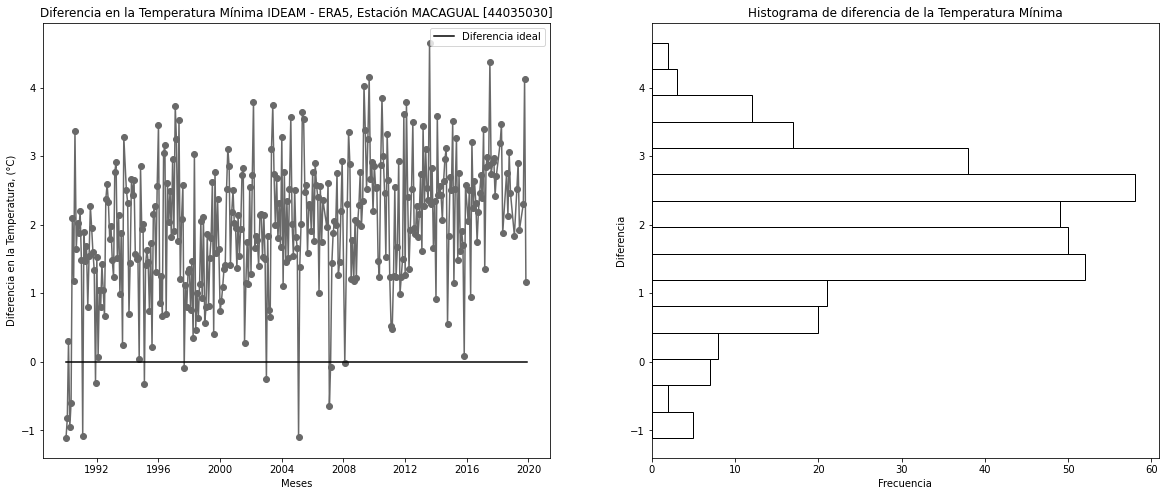

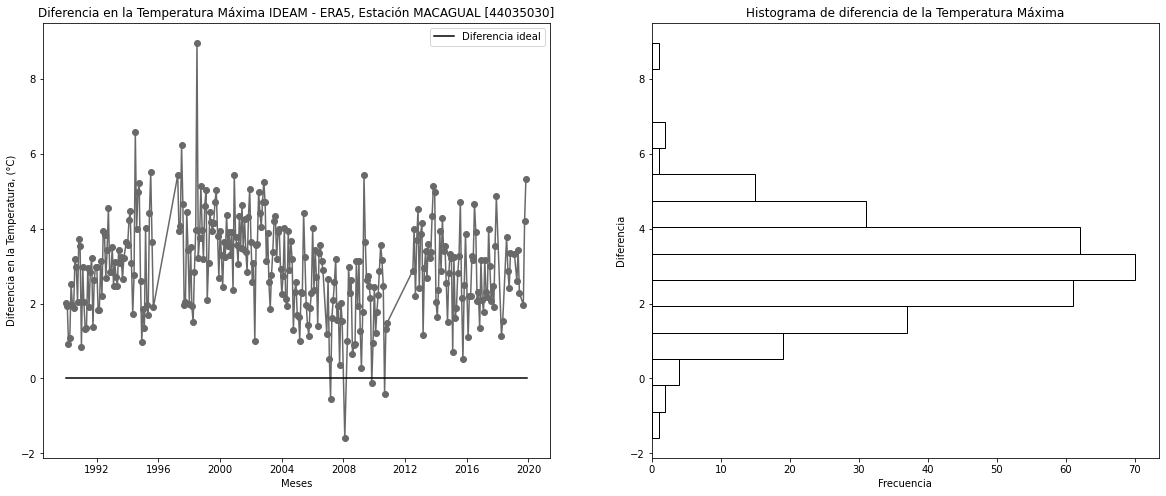


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN MITU [42075010]


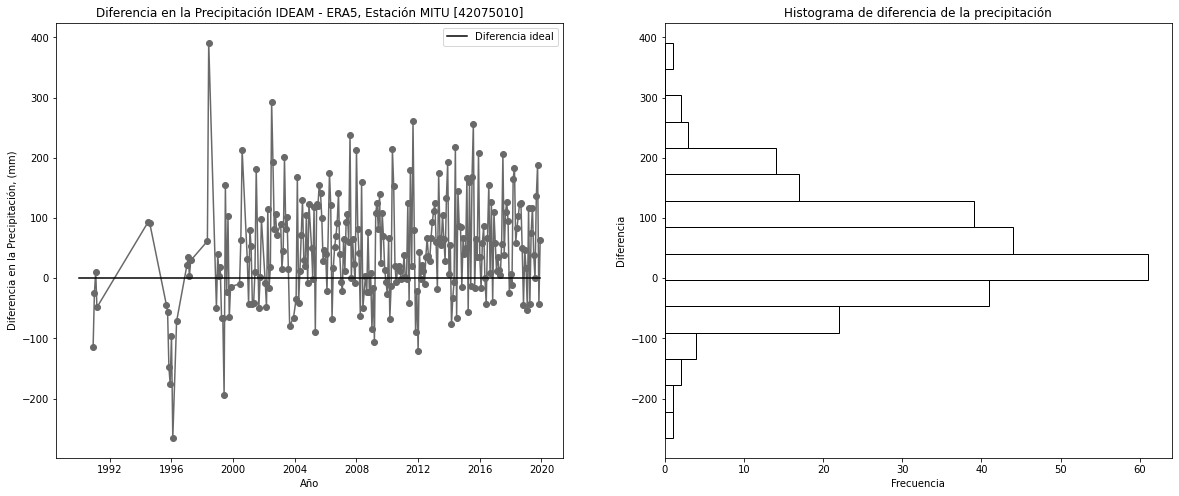

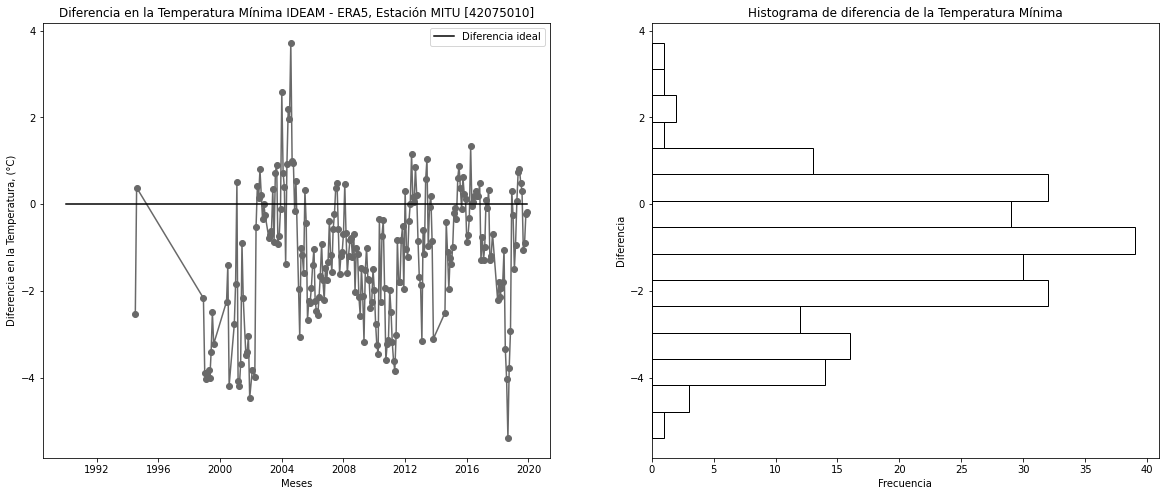

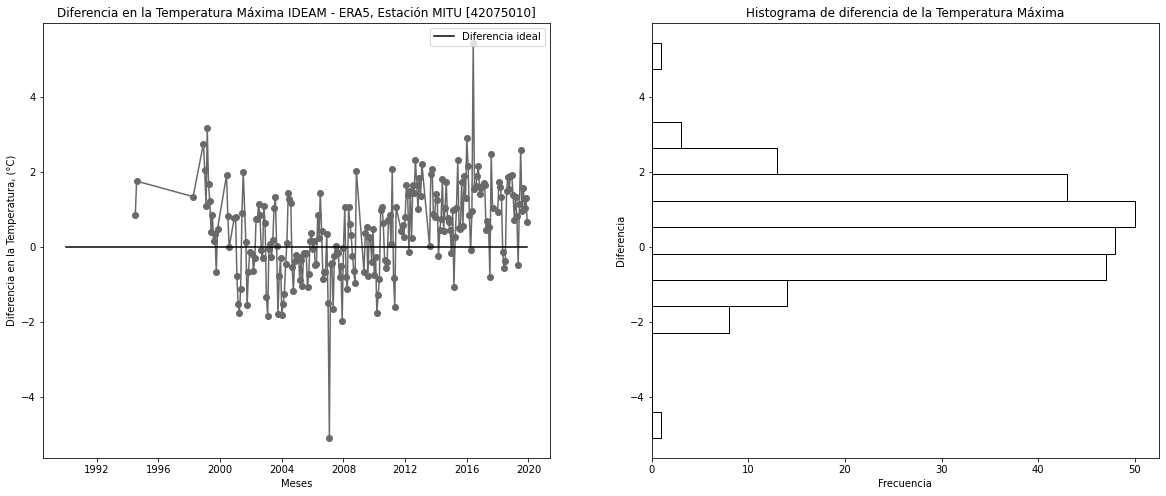


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN PUERTO INIRIDA - AUT [31095030]


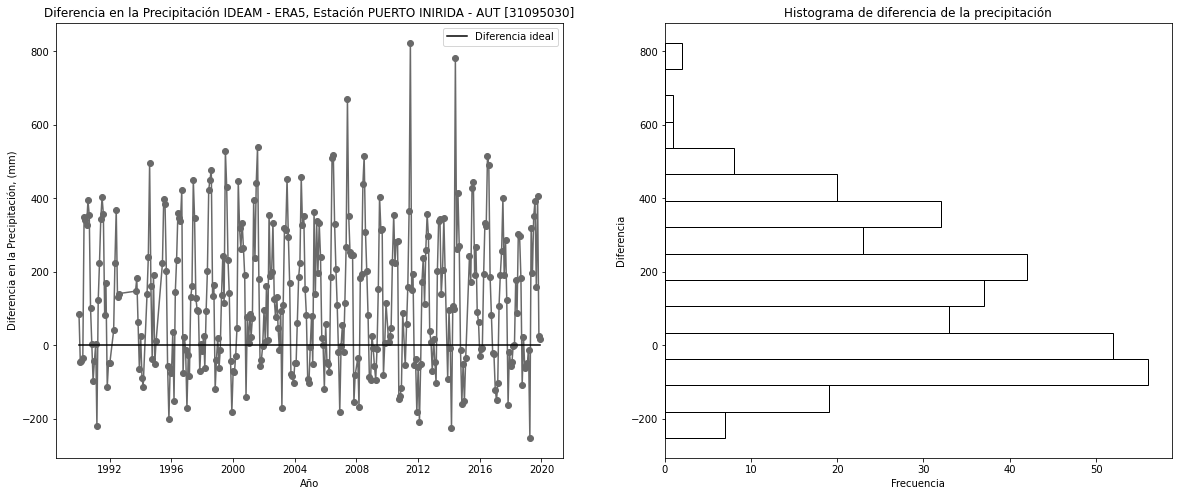

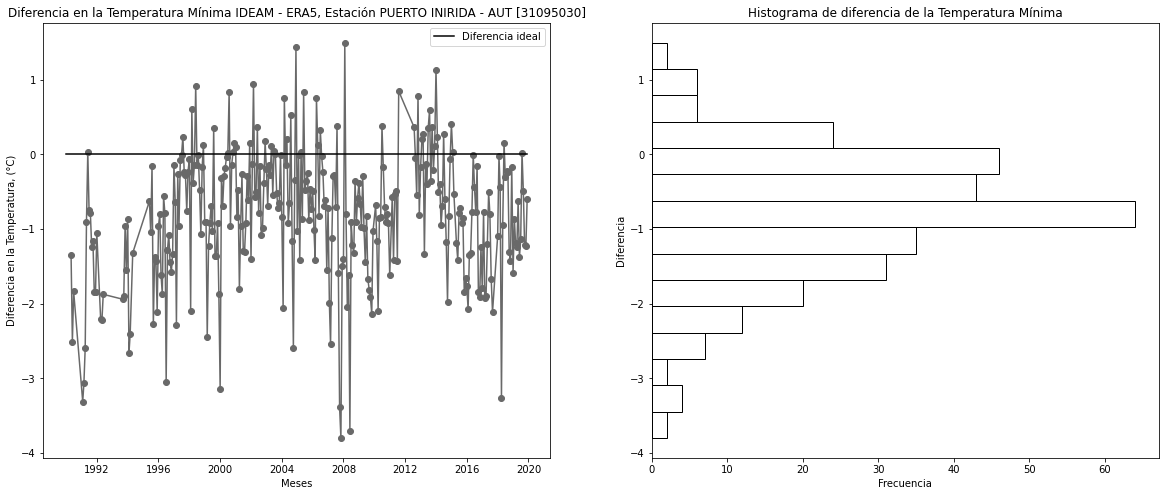

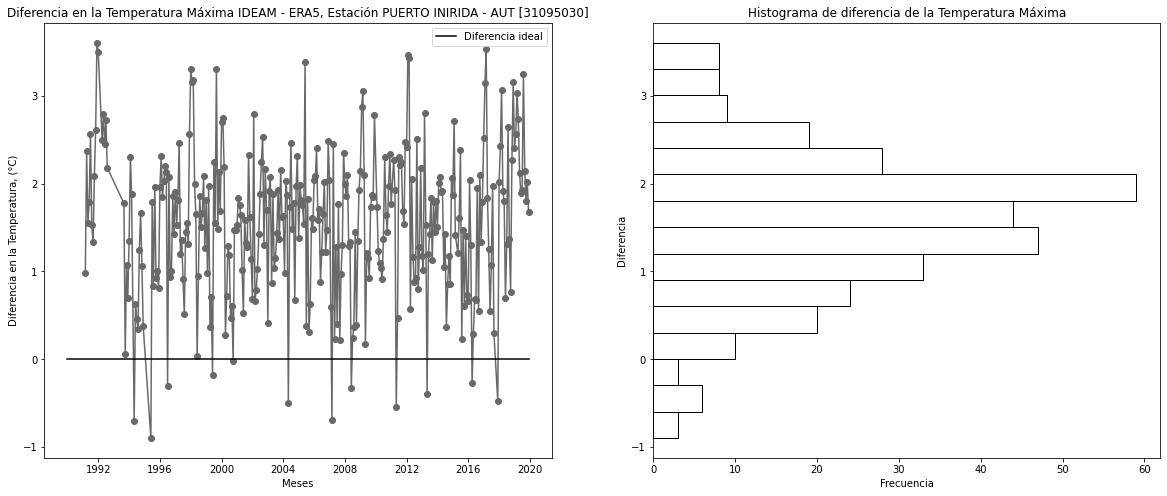


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN PUERTO LEGUIZAMO [47045010]


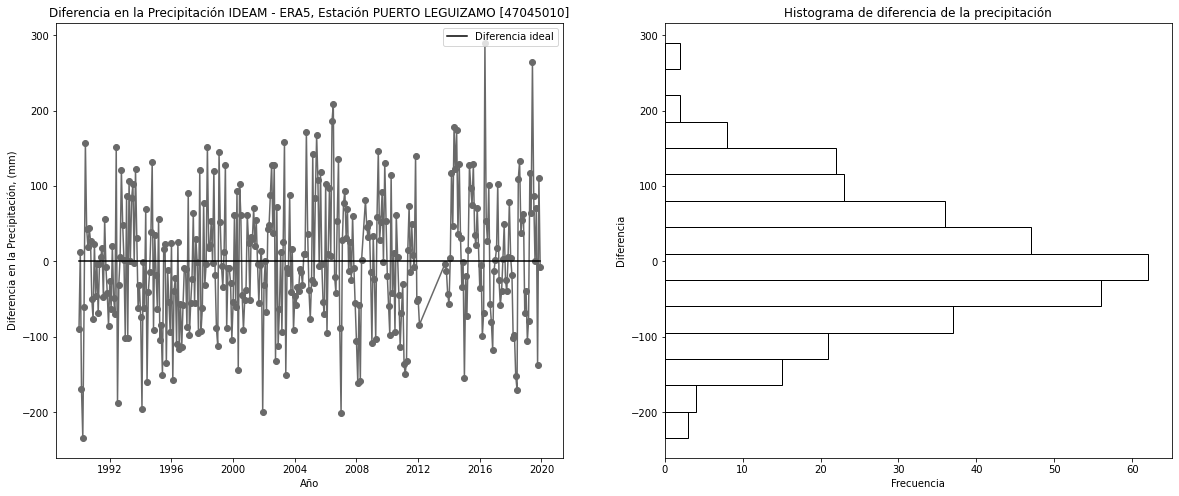

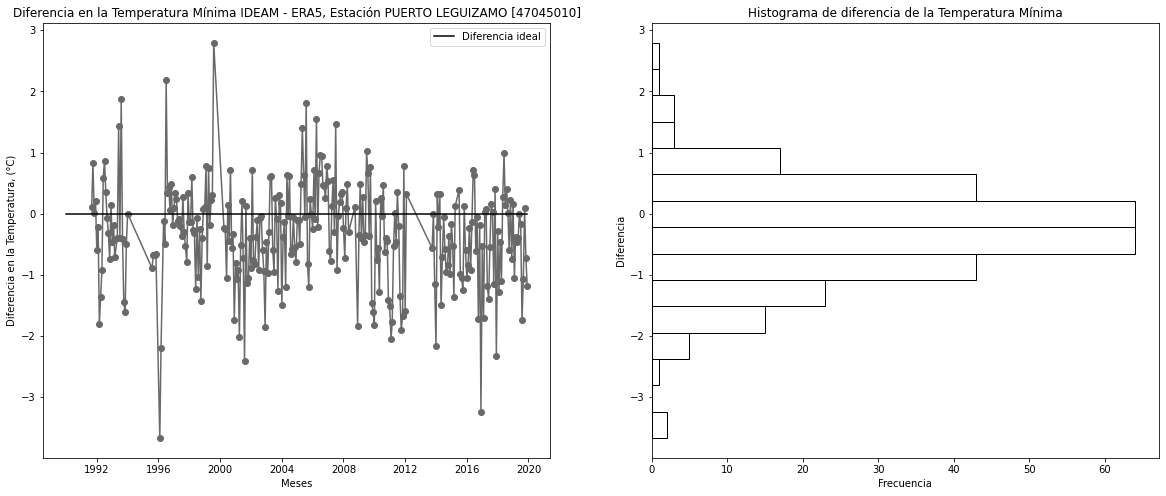

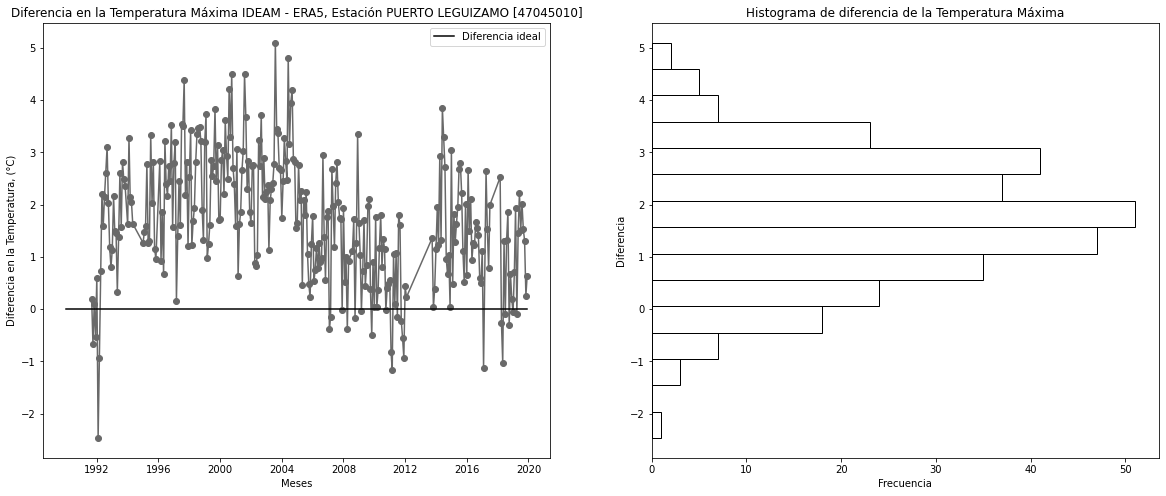


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN MAPIRIPANA [32155010]


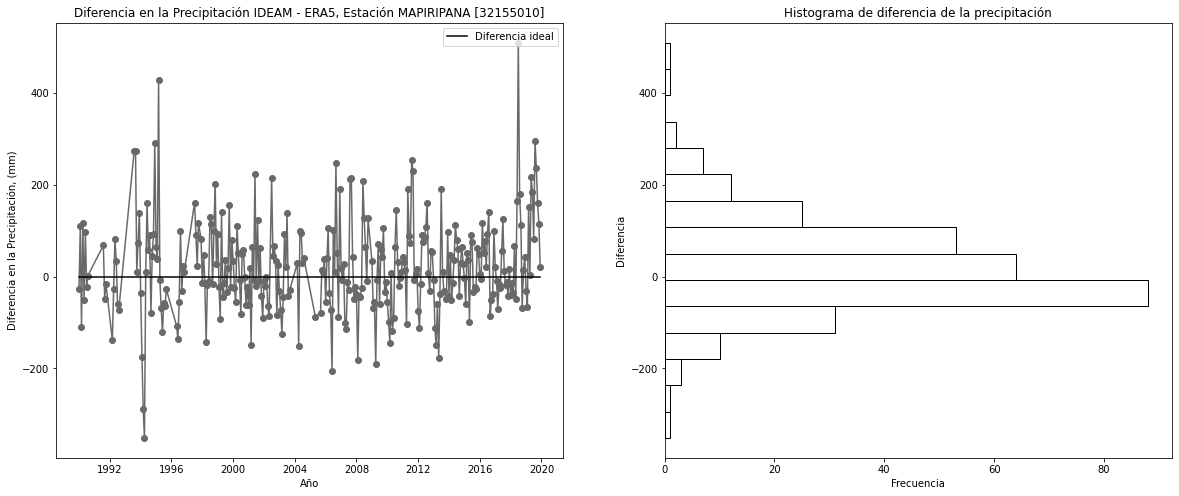

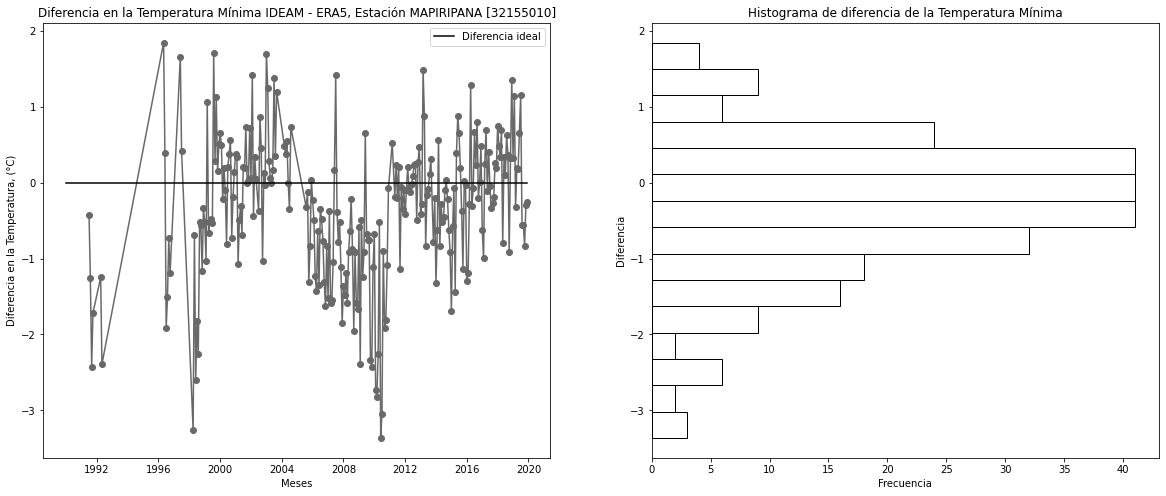

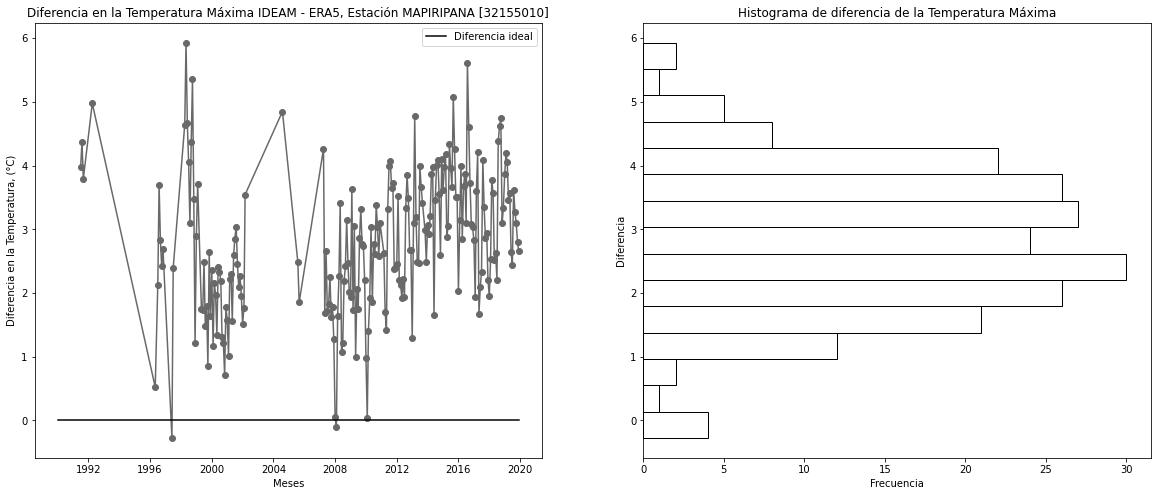


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN SAN VICENTE DEL CAGUAN  - AUT [46015030]


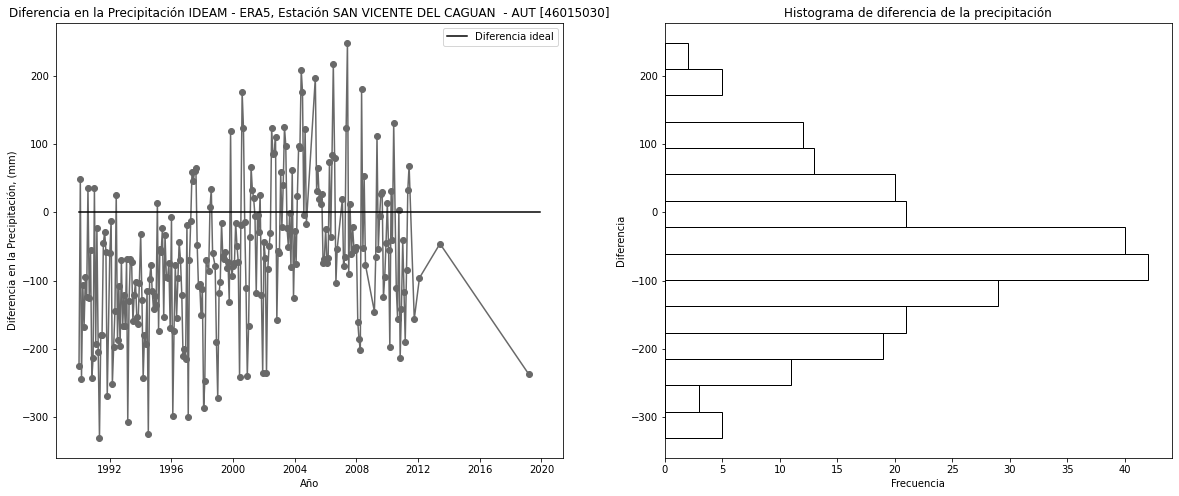

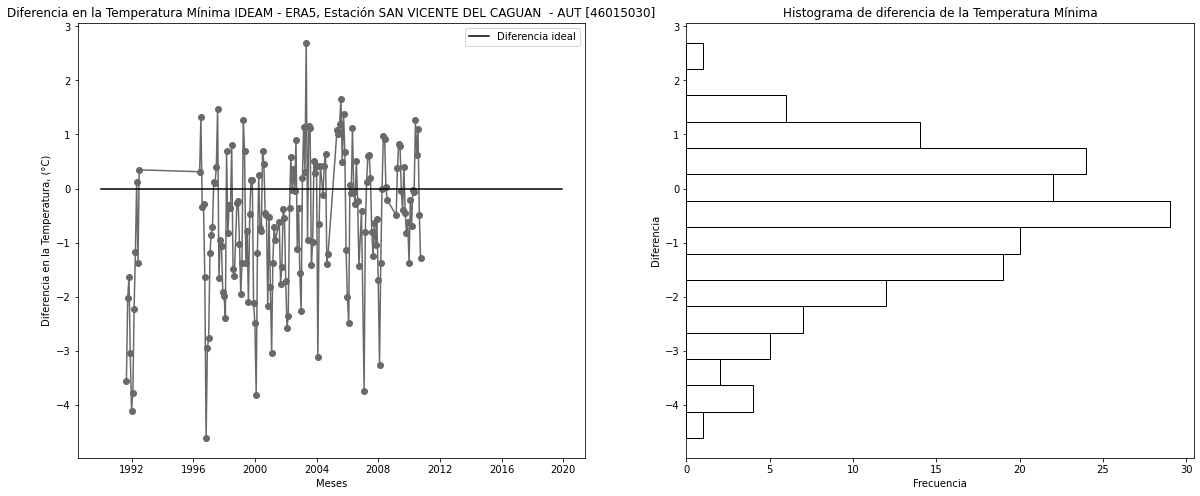

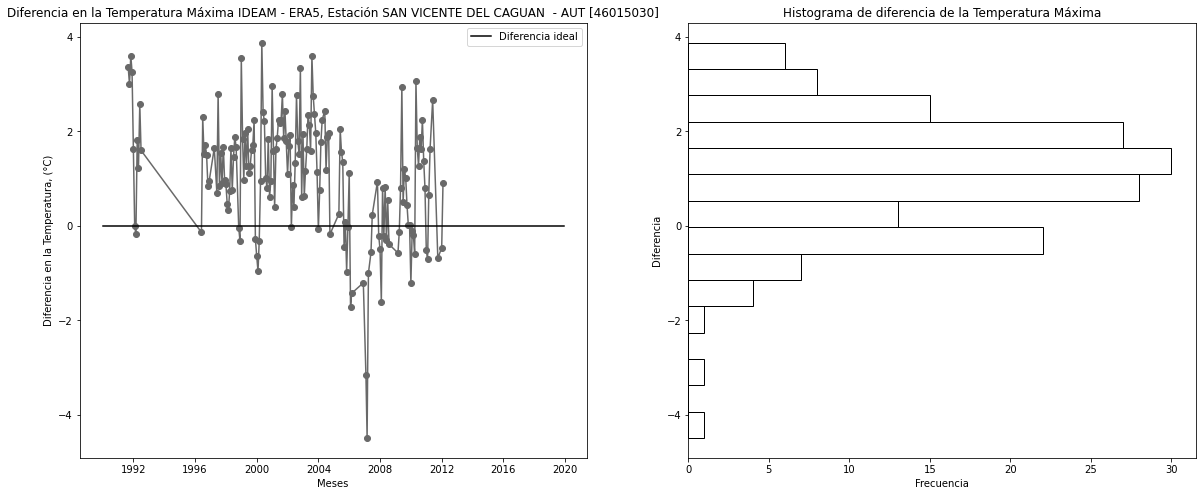


----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
gauss('LaChorrera_1990-2019.xlsx')
gauss('Leticia_1990-2019.xlsx')
gauss('Macagual_1990-2019.xlsx')
gauss('Mitu_1990-2019.xlsx')
gauss('PuertoInirida_1990-2019.xlsx')
gauss('PuertoLeguizamo_1990-2019.xlsx')
gauss('SanJoseDelGuaviare_1990-2019.xlsx')
gauss('SanVicenteDelCaguan_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE


In [ ]:
gauss('ElMellito_1990-2019.xlsx')
gauss('EscuelaNavalCIOH_1990-2019.xlsx')
gauss('Guaymaral_1990-2019.xlsx')
gauss('LasFlores_1990-2019.xlsx')
gauss('Lorica_1990-2019.xlsx')
gauss('LosAlamos_1990-2019.xlsx')
gauss('Manaure_1990-2019.xlsx')
gauss('SanLorenzo_1990-2019.xlsx')
gauss('Turbo_1990-2019.xlsx')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR


ESTACIÓN AEROPUERTO EL EMBRUJO [17025020]


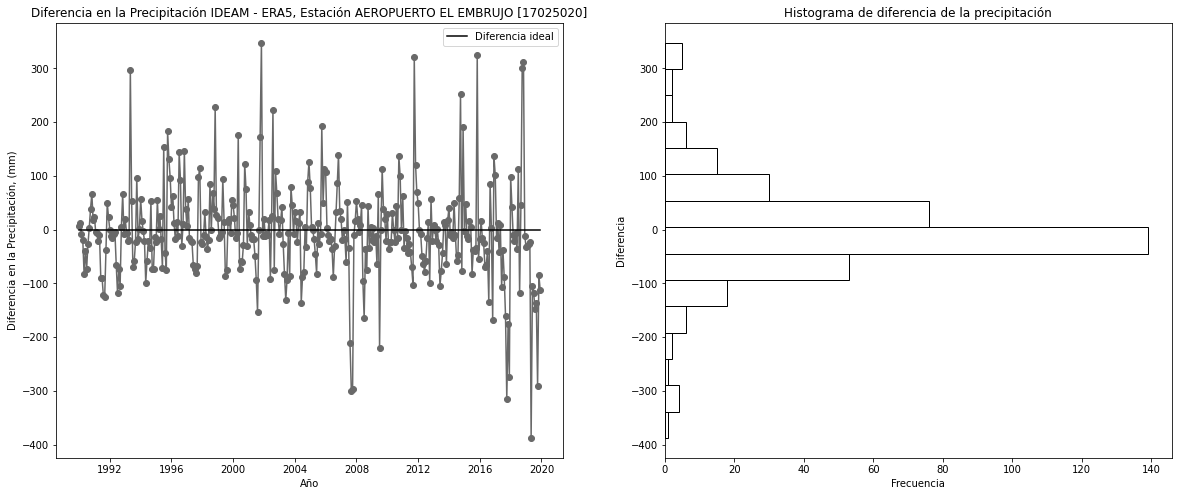

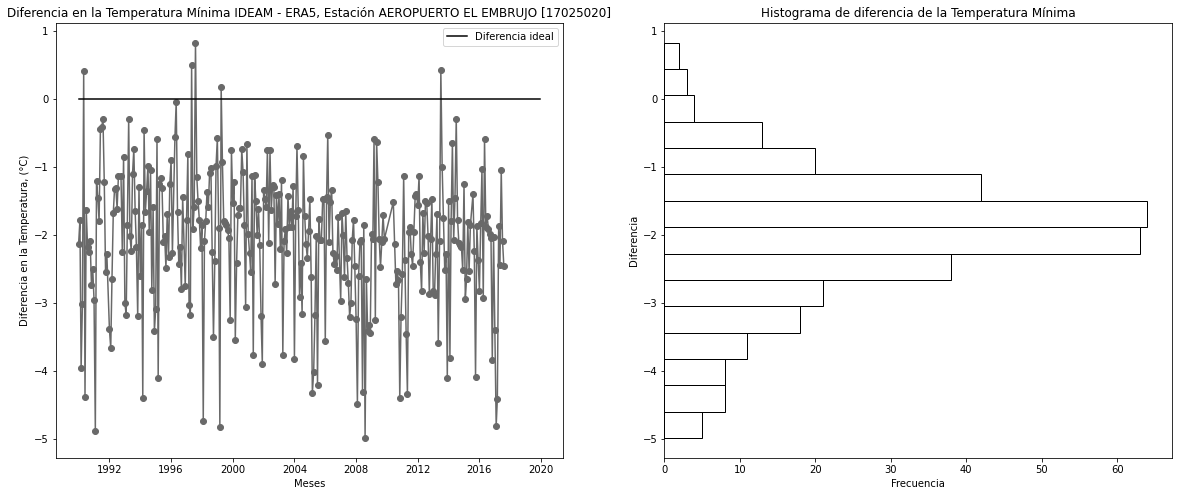

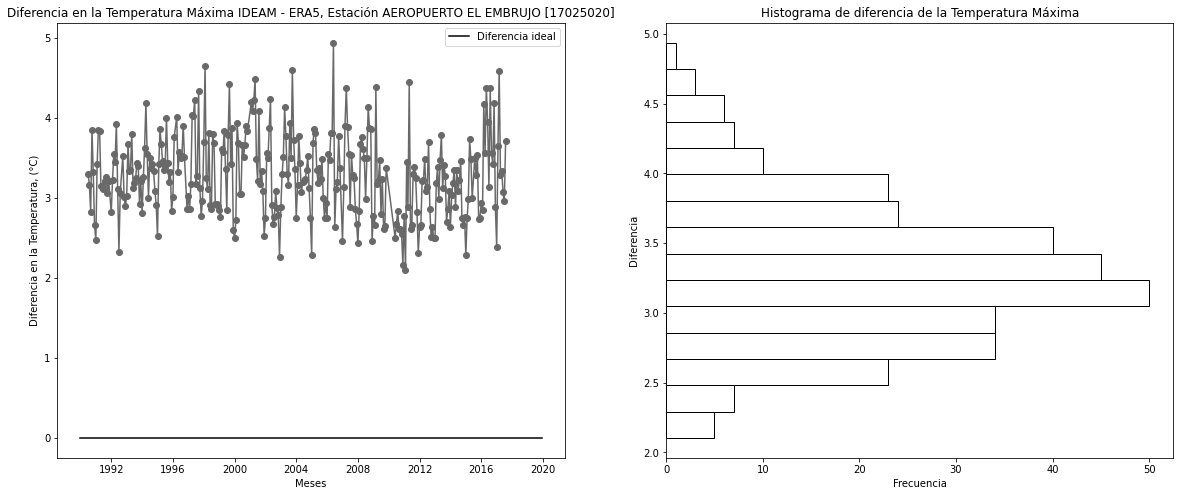


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN AEROPUERTO SESQUICENTENARIO [17015010]


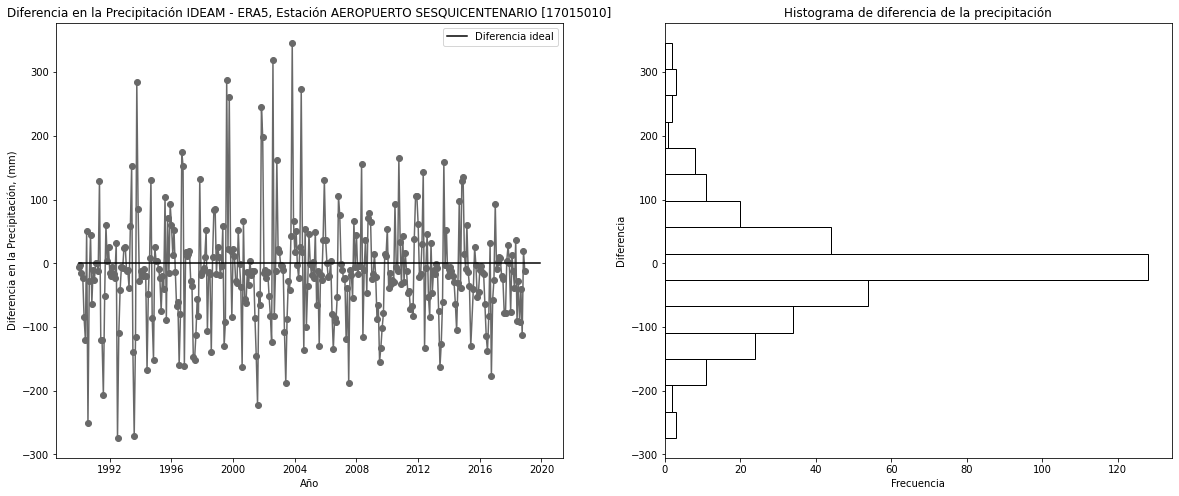

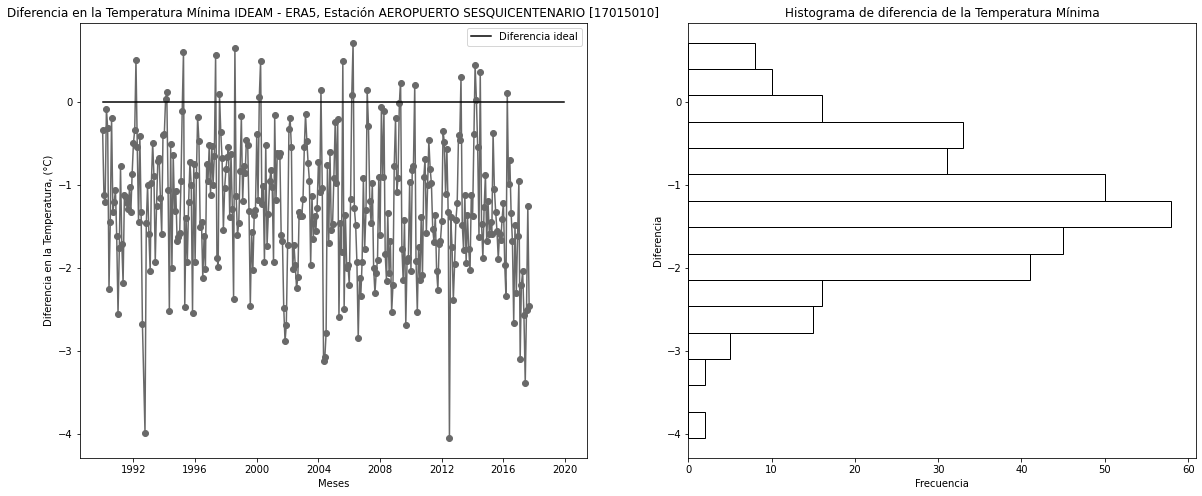

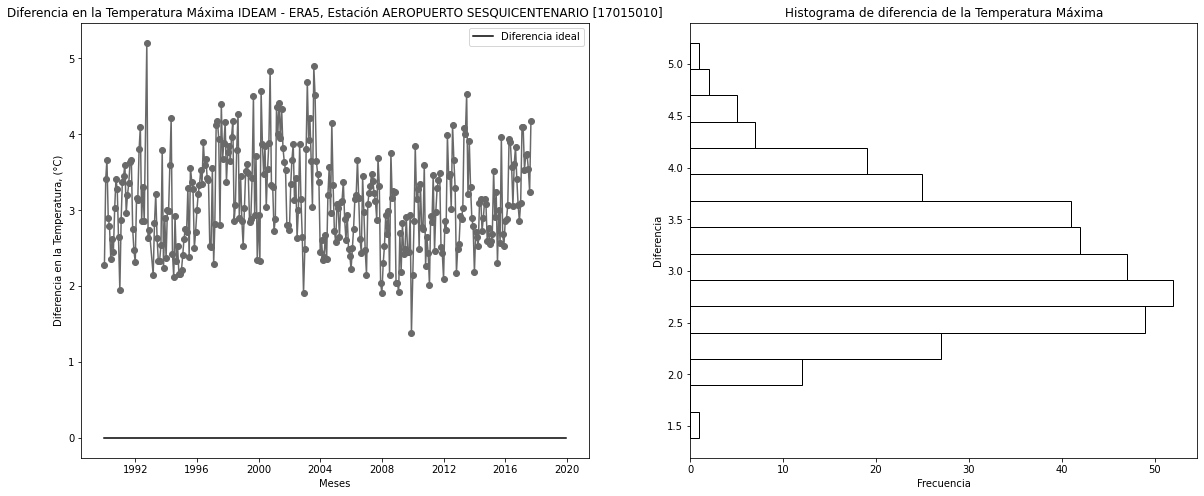


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN GORGONA GUAPI [57025020]


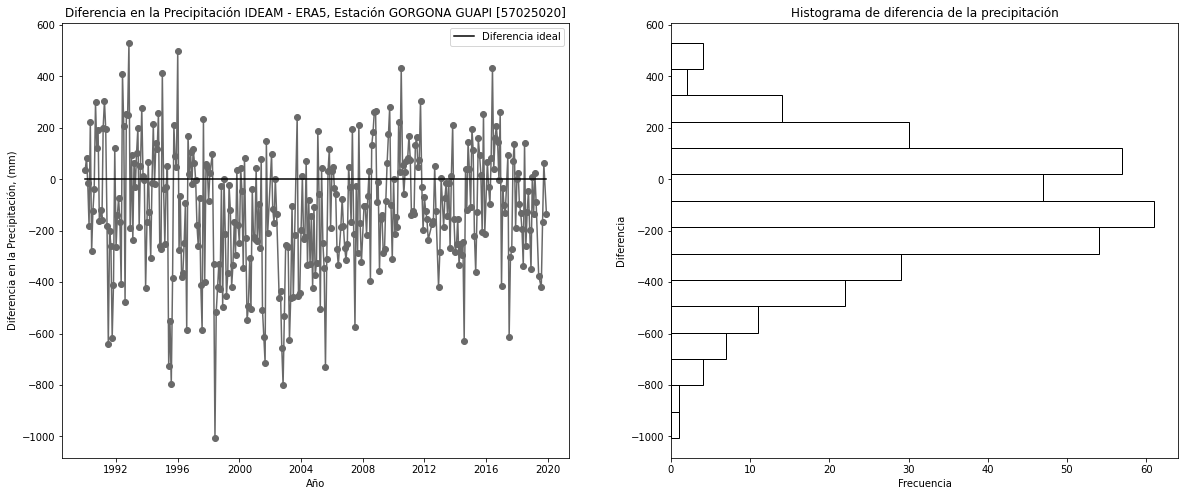

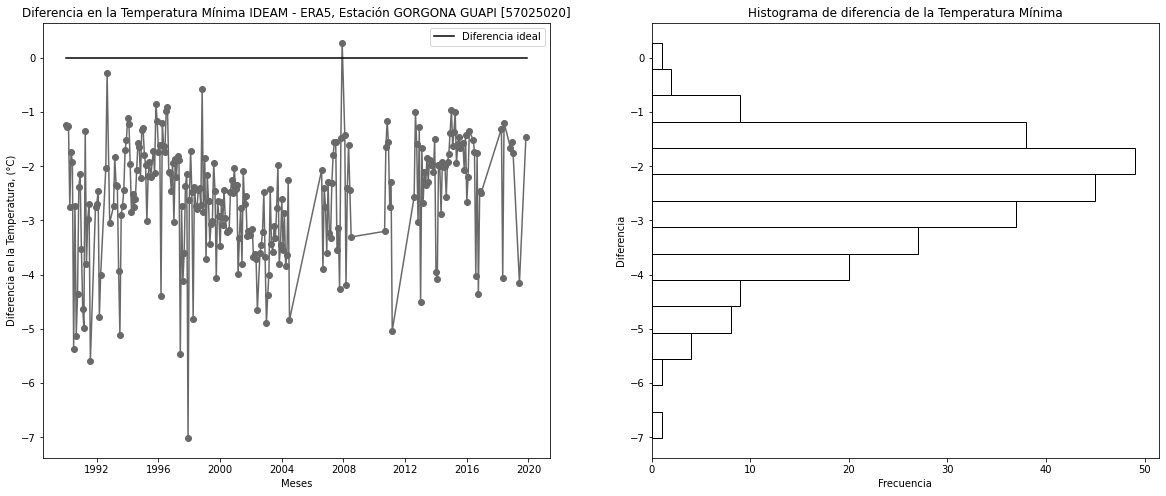

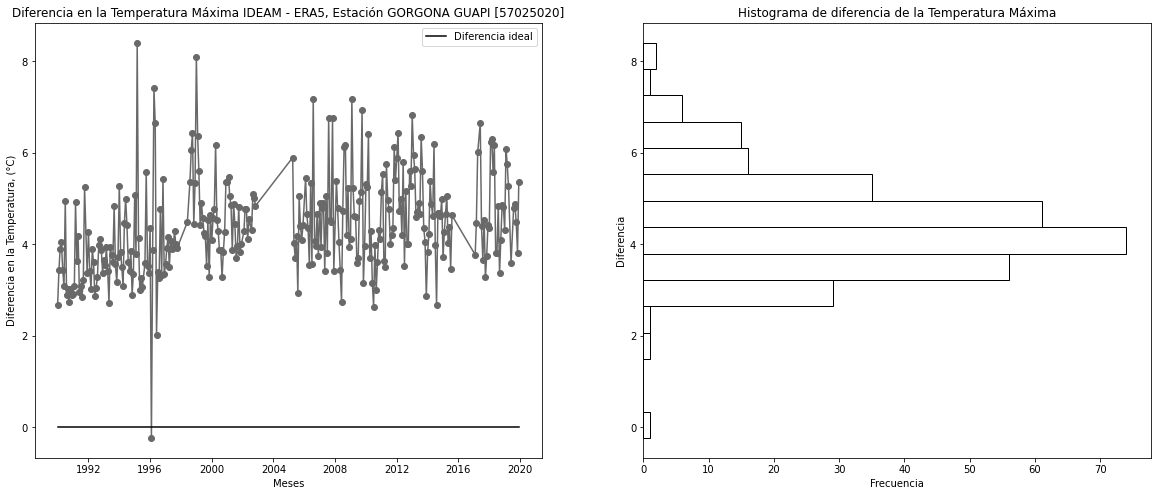


----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
gauss('AElEmbrujo_1990-2019.xlsx')
gauss('ASesquicentenario_1990-2019.xlsx')
gauss('Gorgona_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA


ESTACIÓN AEROPUERTO PUERTO CARRENO [38015030]


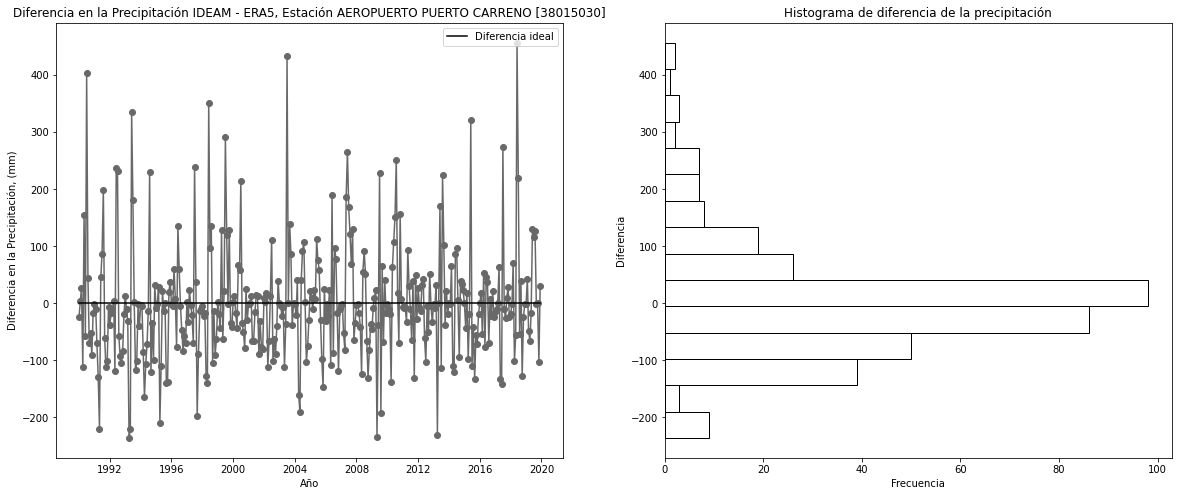

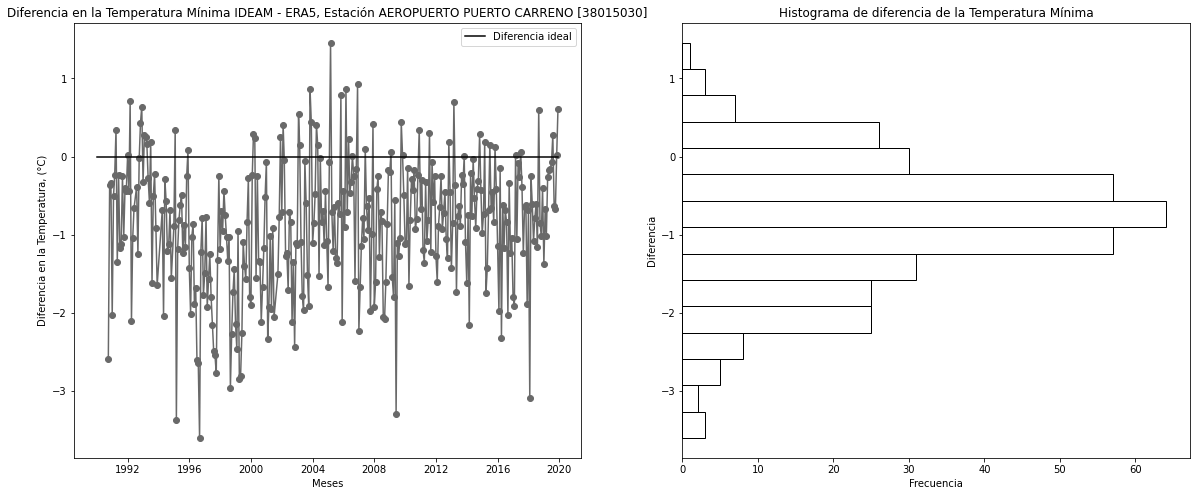

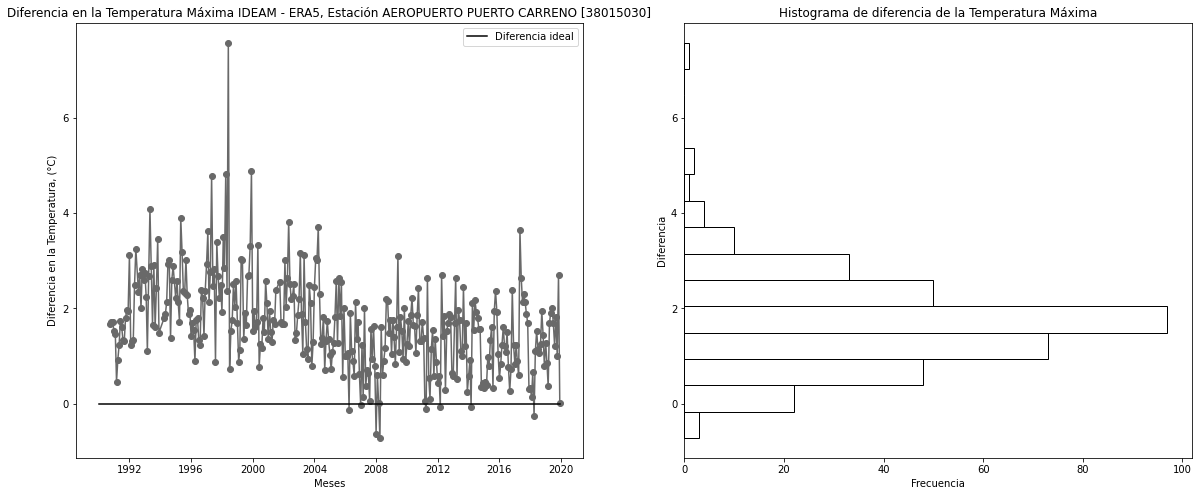


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN AEROPUERTO SANTIAGO PÃ‰REZ [37055010]


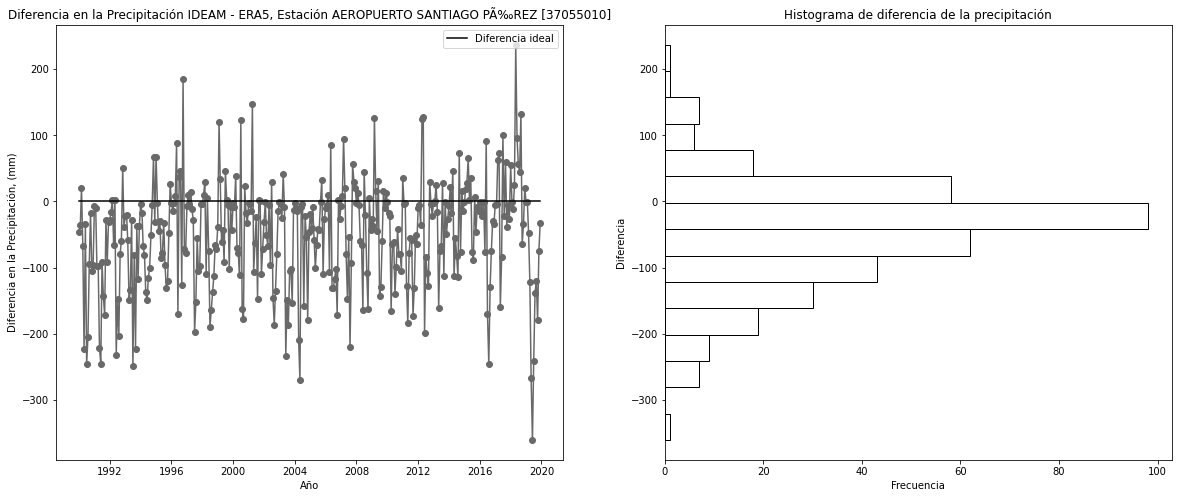

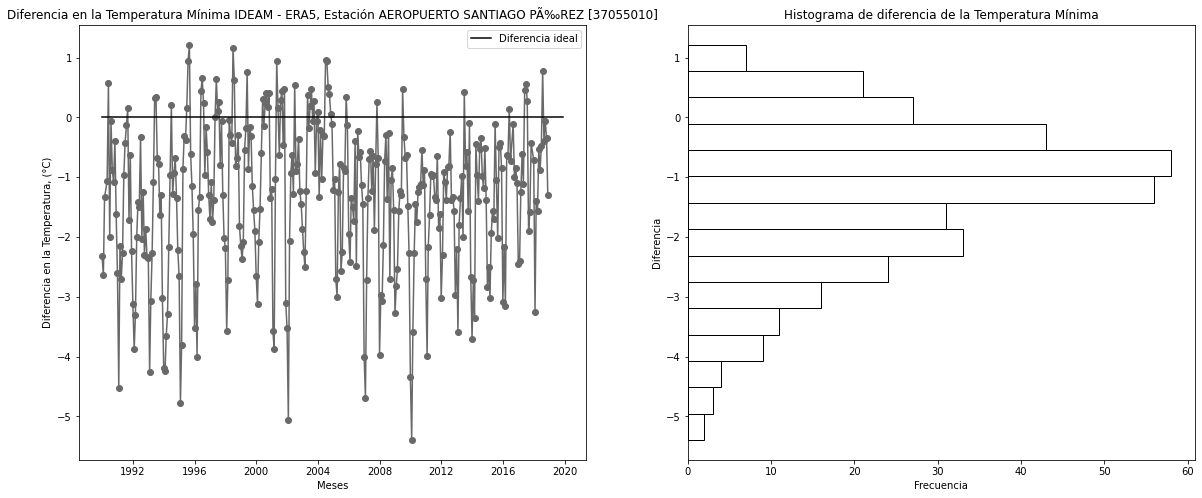

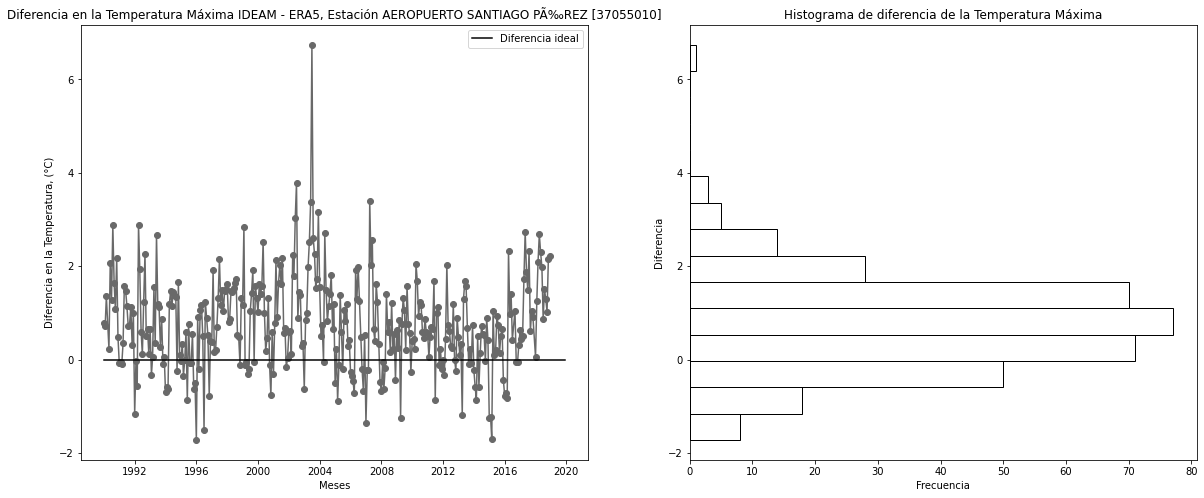


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN AEROPUERTO YOPAL - AUT [35215020]


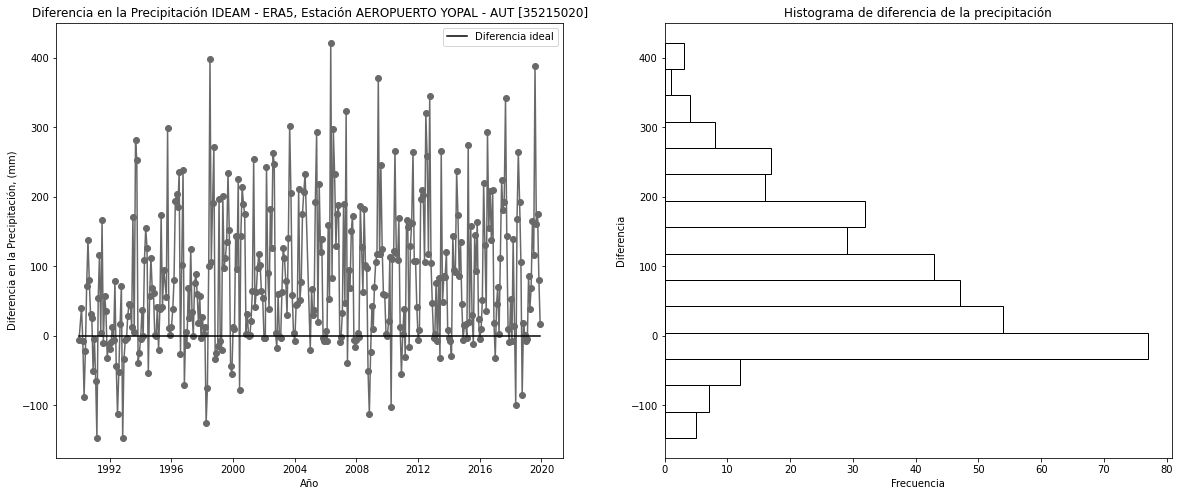

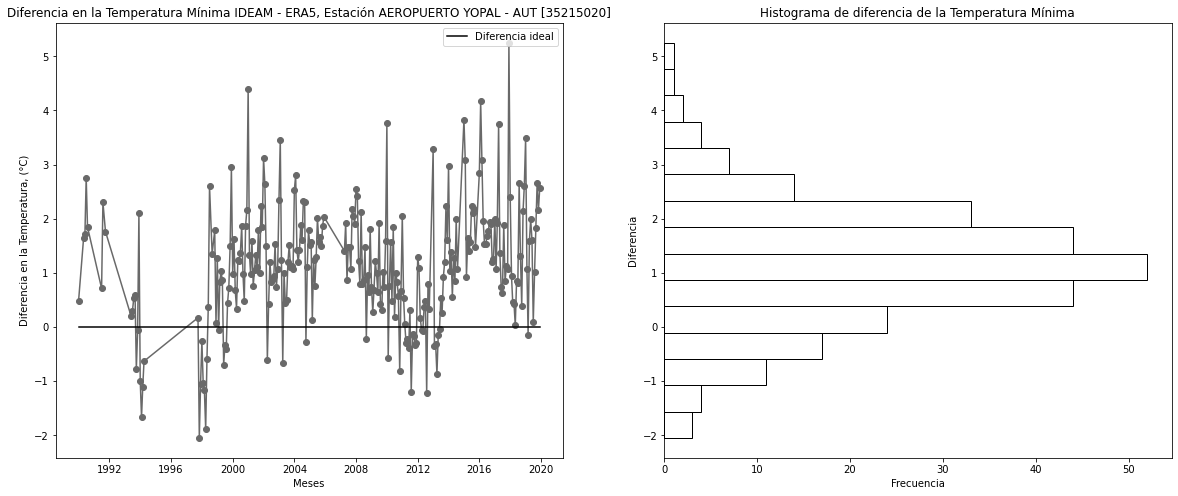

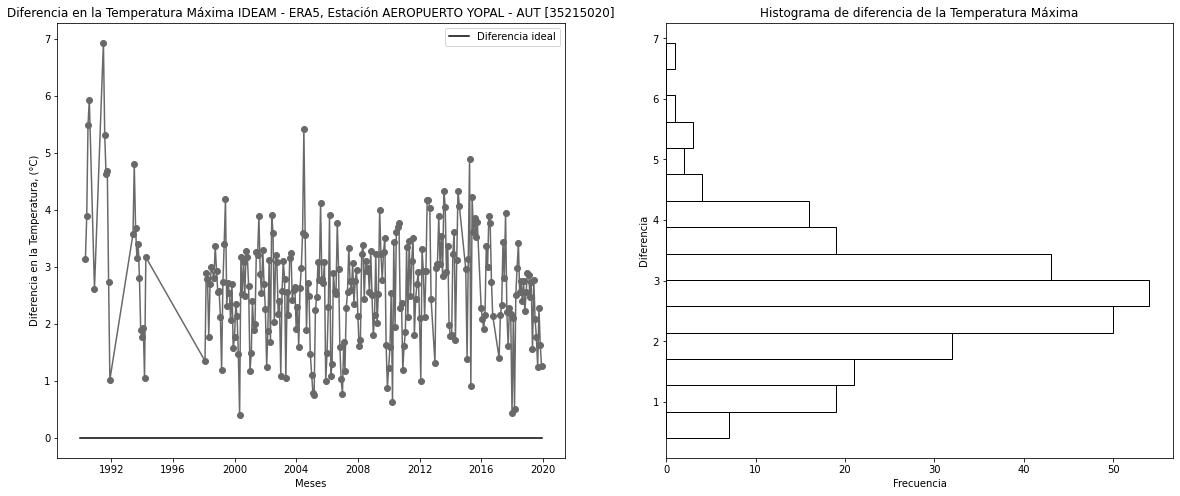


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN LAS GAVIOTAS [34015010]


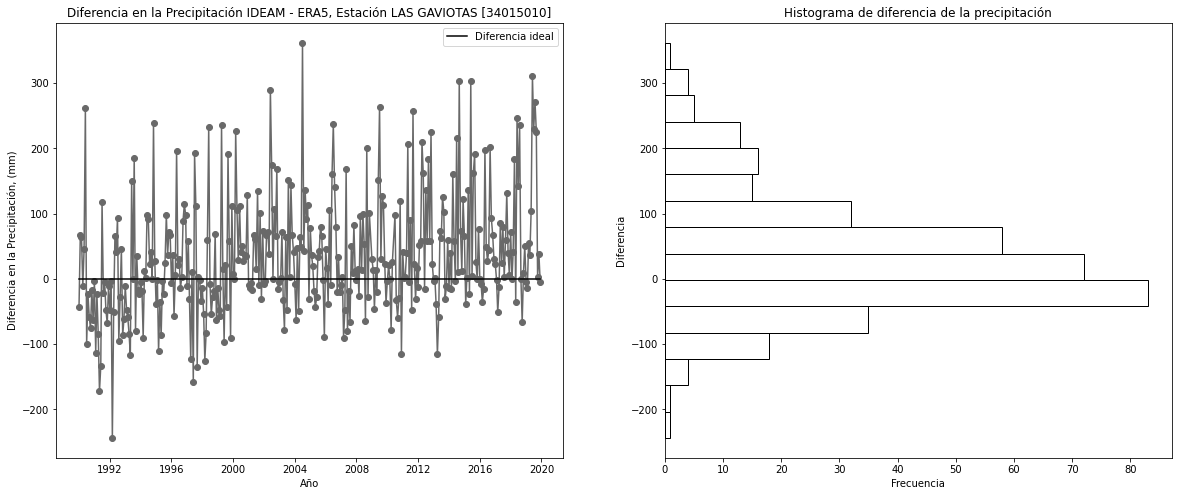

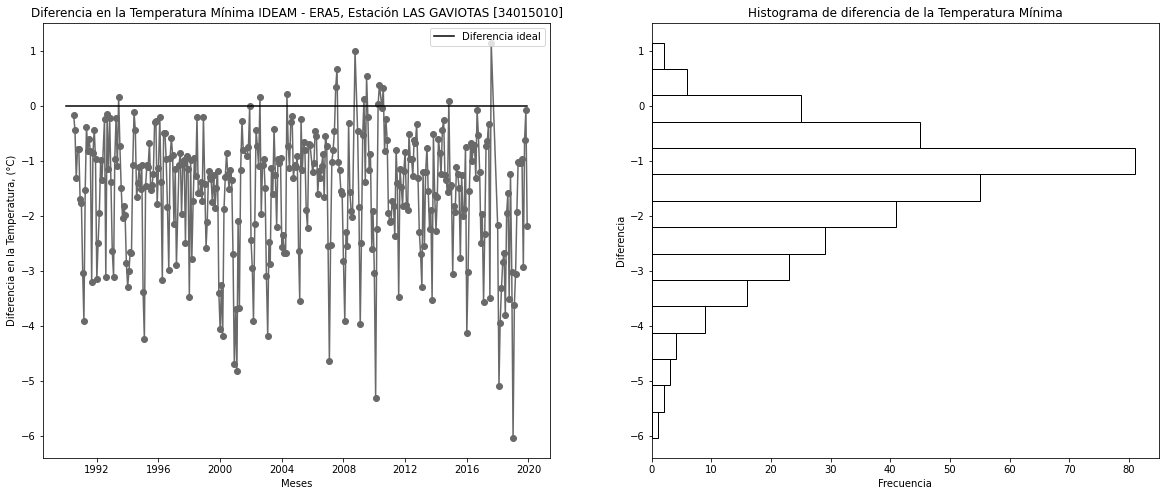

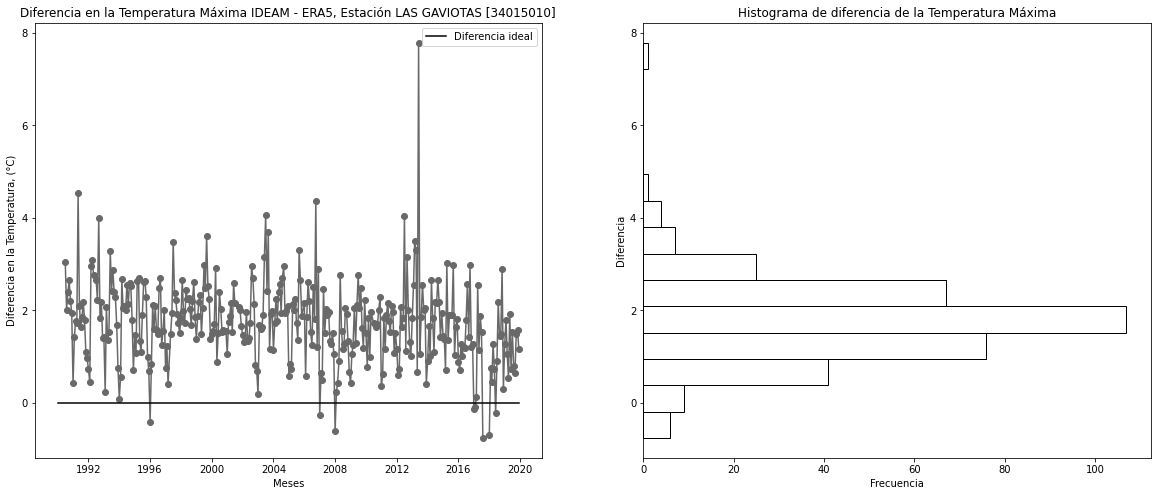


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN MODULOS - AUT [35225030]


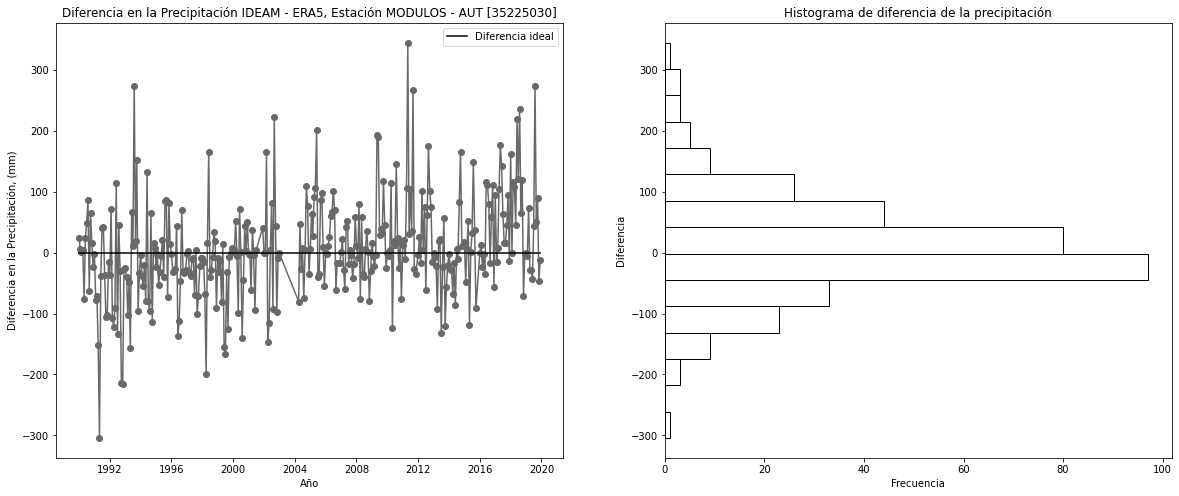

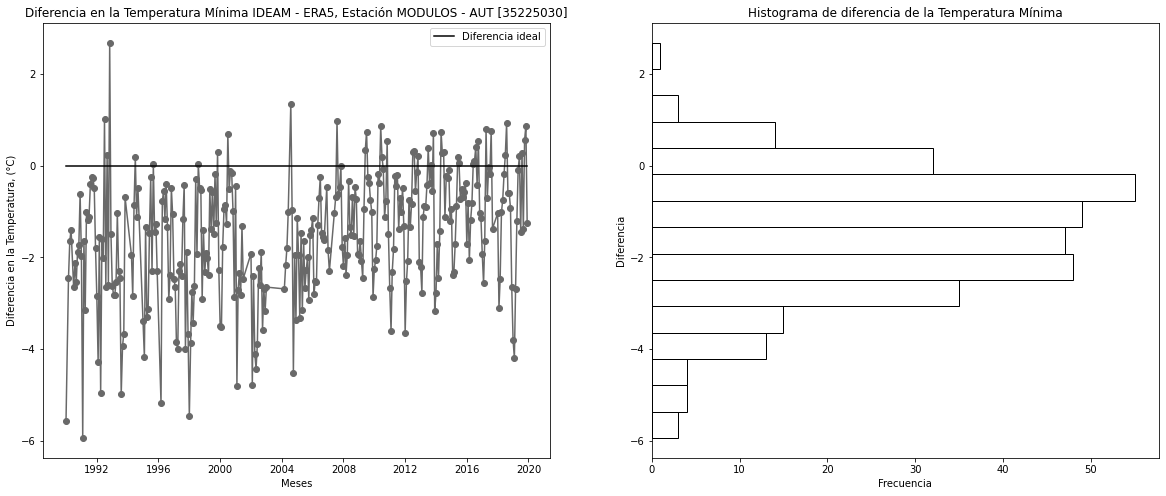

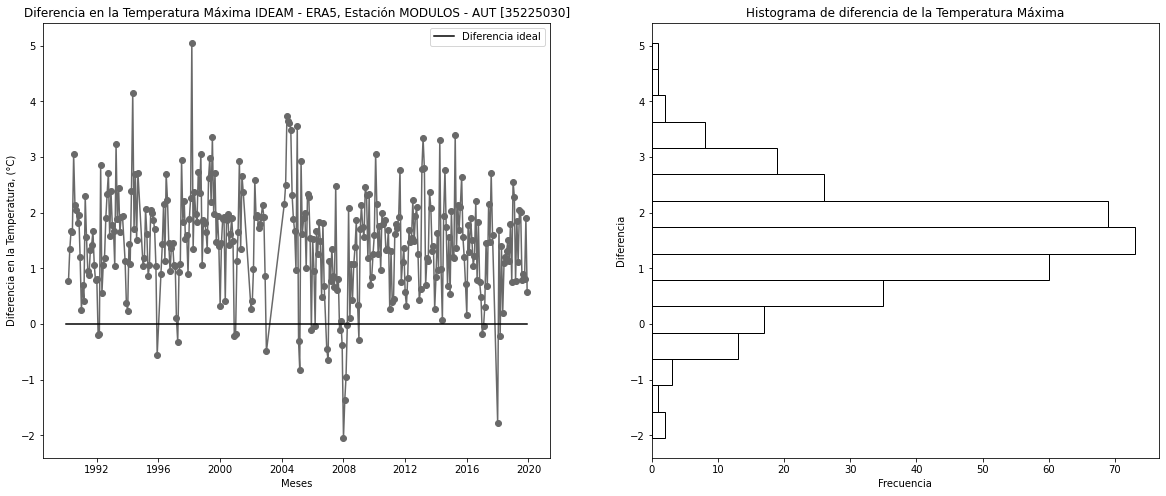


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN SARAVENA  - AUT [37045010]


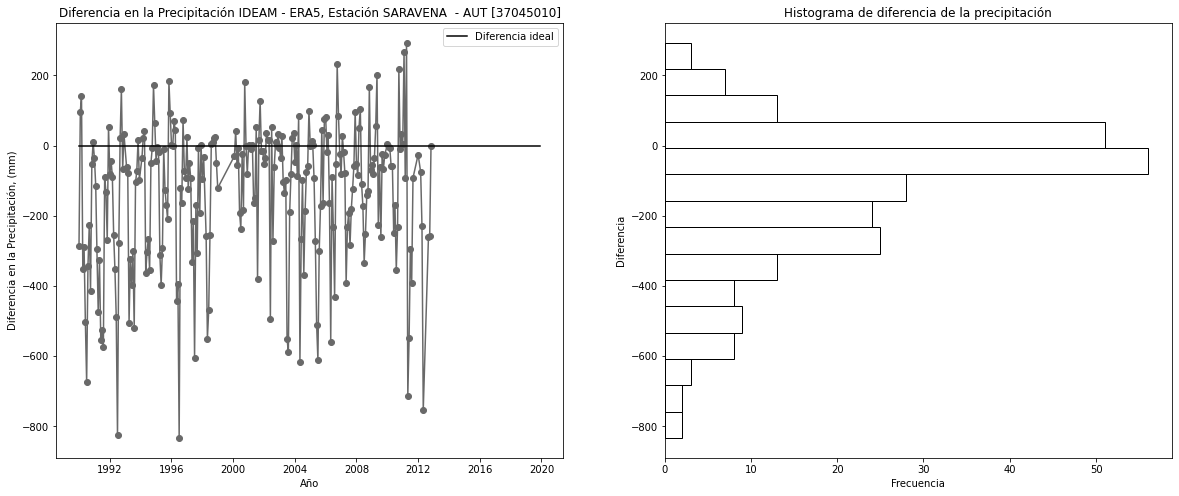

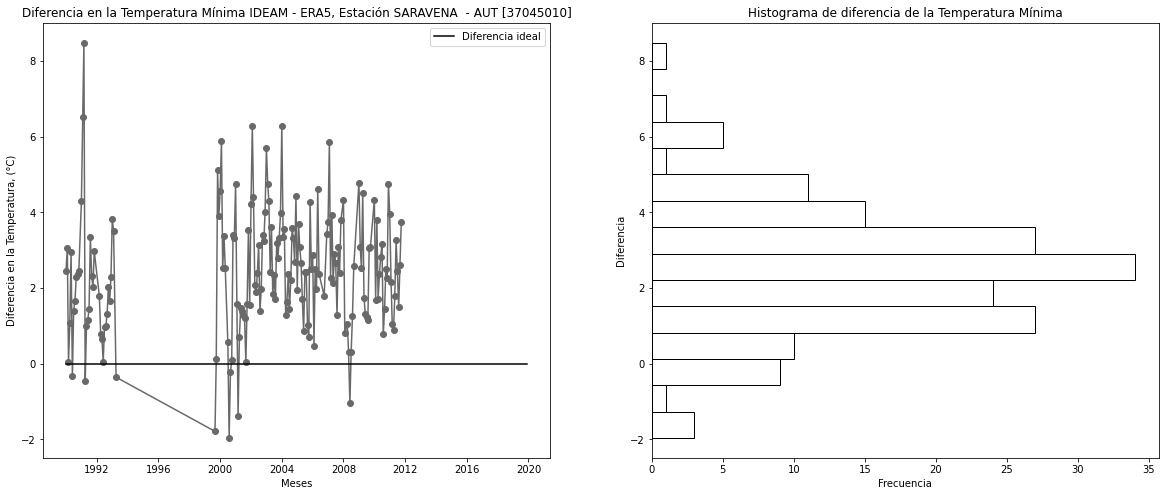

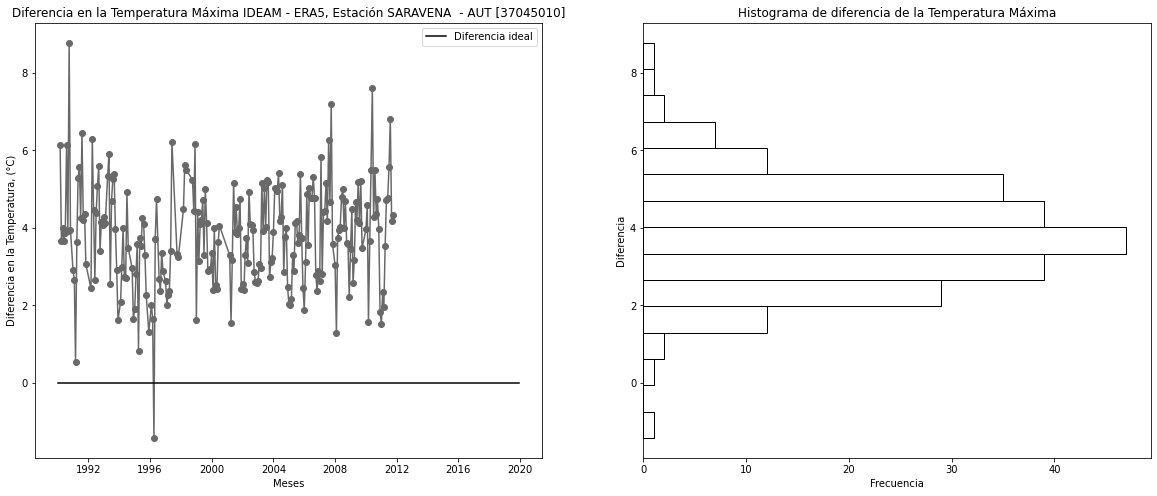


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN TAME [36025010]


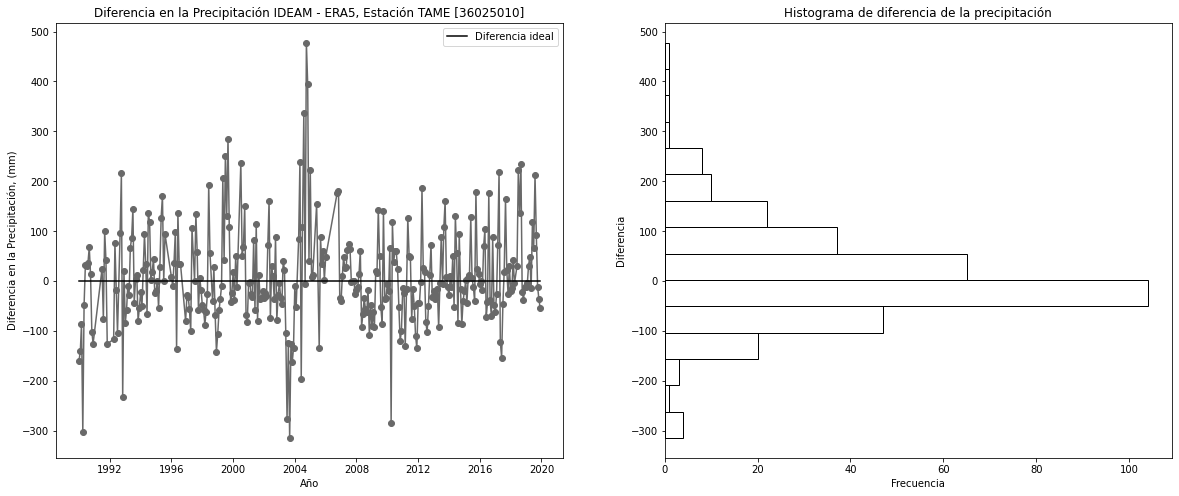

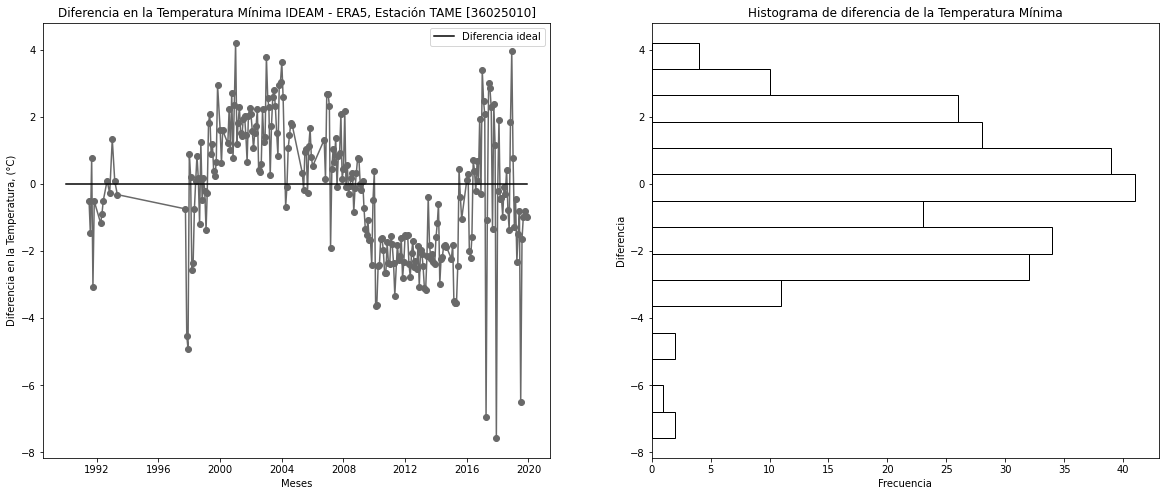

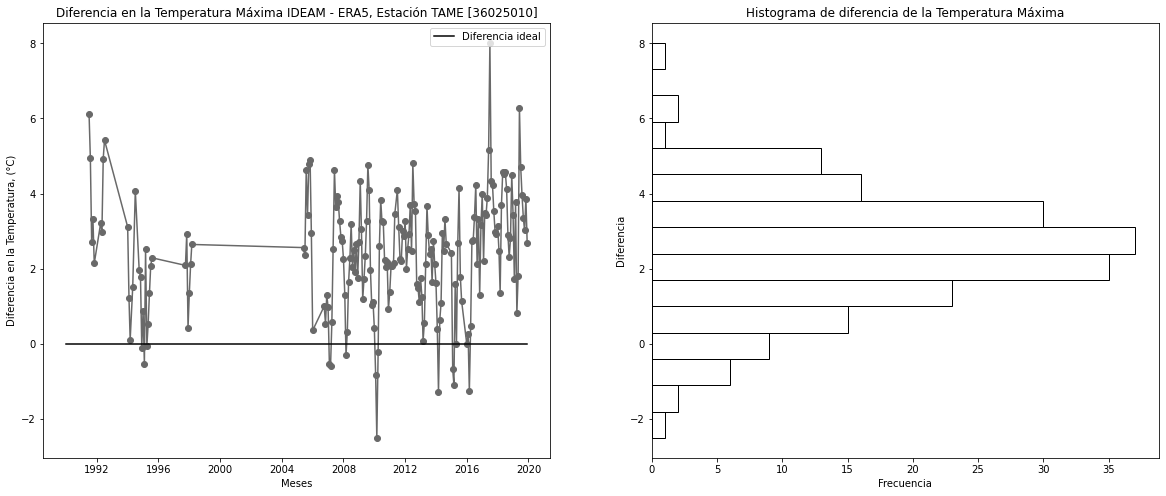


----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
gauss('APuertoCarreno_1990-2019.xlsx')
gauss('ASantiagoPerez_1990-2019.xlsx')
gauss('AYopal_1990-2019.xlsx')
gauss('LasGaviotas_1990-2019.xlsx')
gauss('Modulos_1990-2019.xlsx')
gauss('Saravena_1990-2019.xlsx')
gauss('Tame_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA


ESTACIÓN AEROPUERTO EL CARANO [11045010]


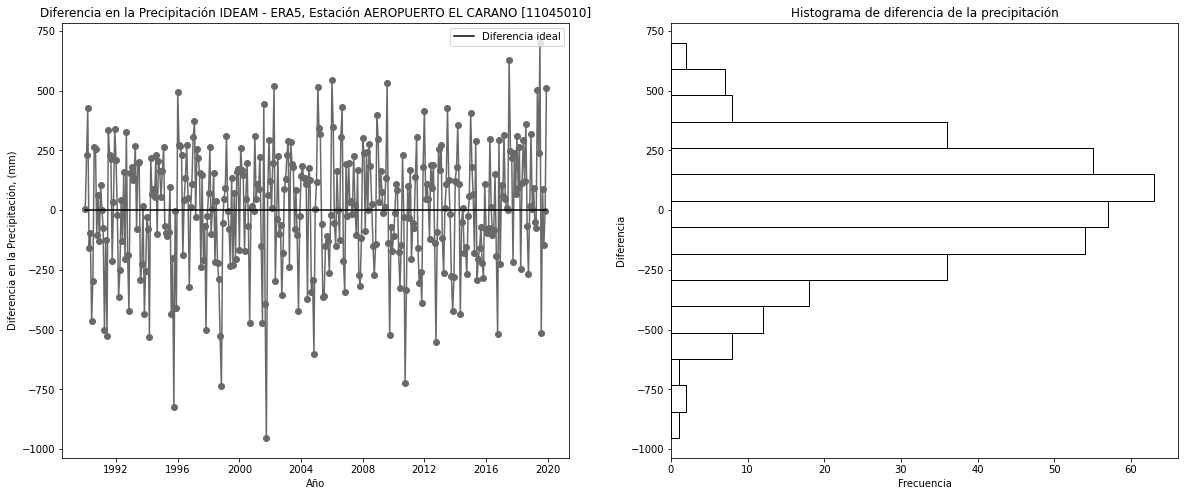

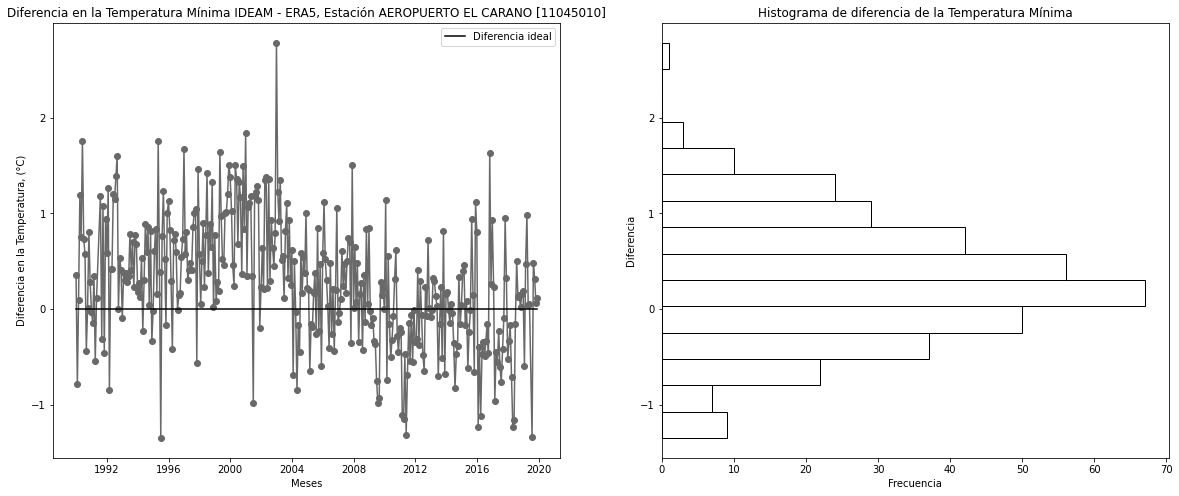

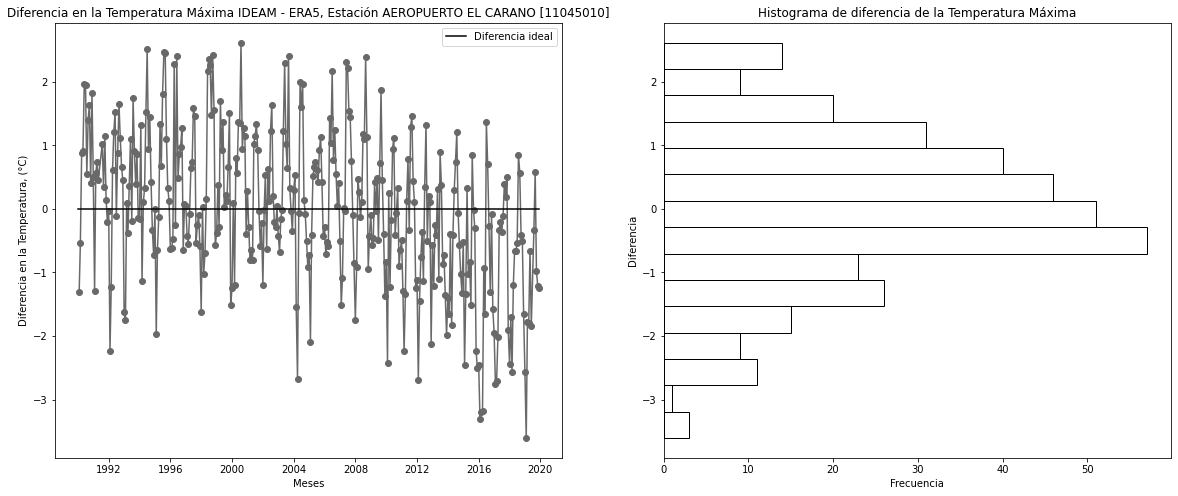


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN BAJO CALIMA [54075020]


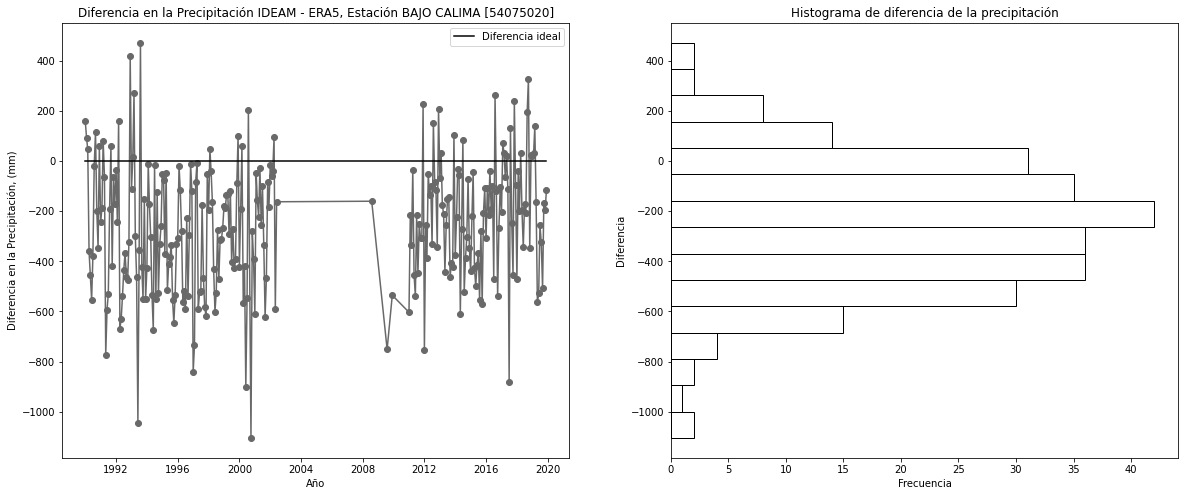

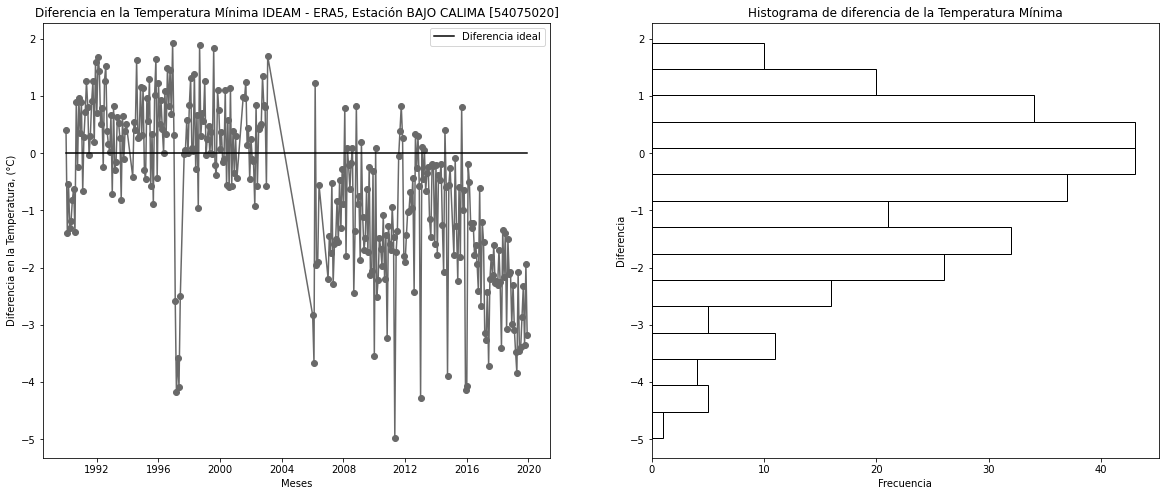

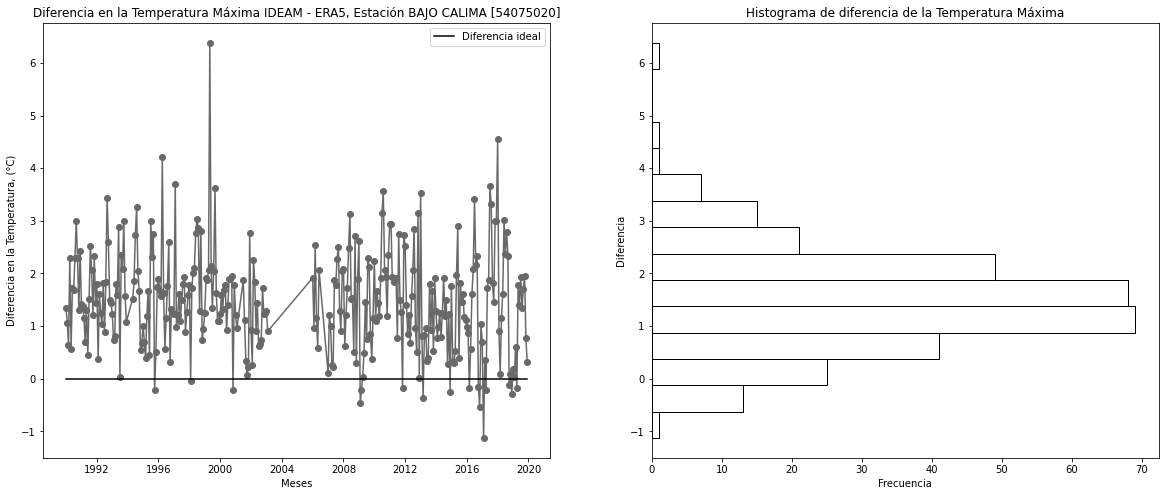


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN NOANAMA [54085010]


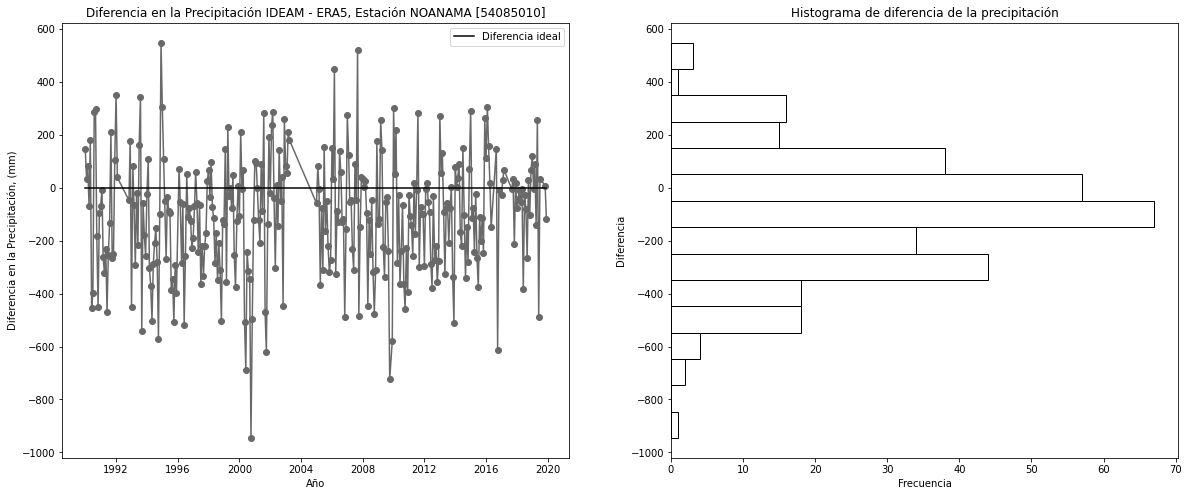

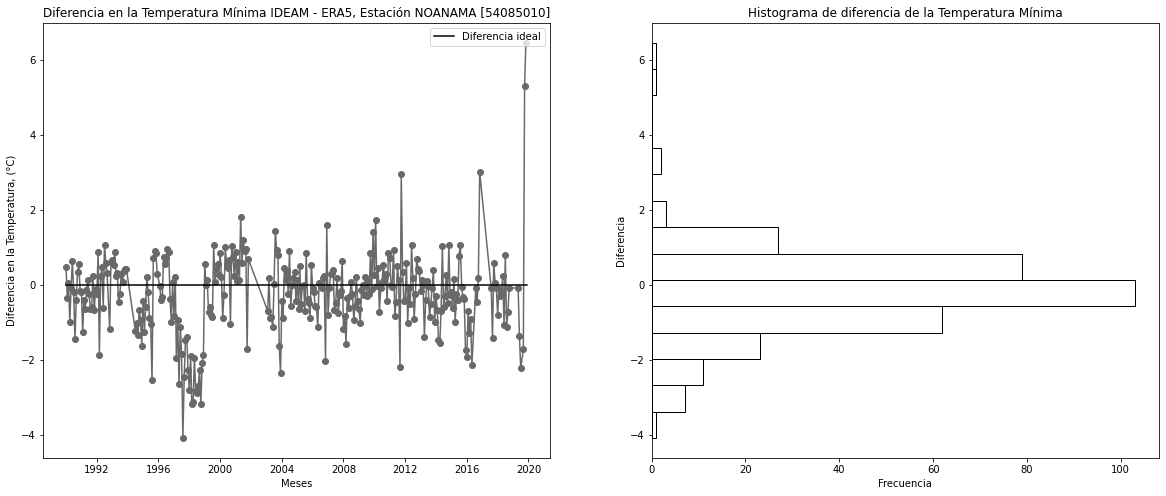

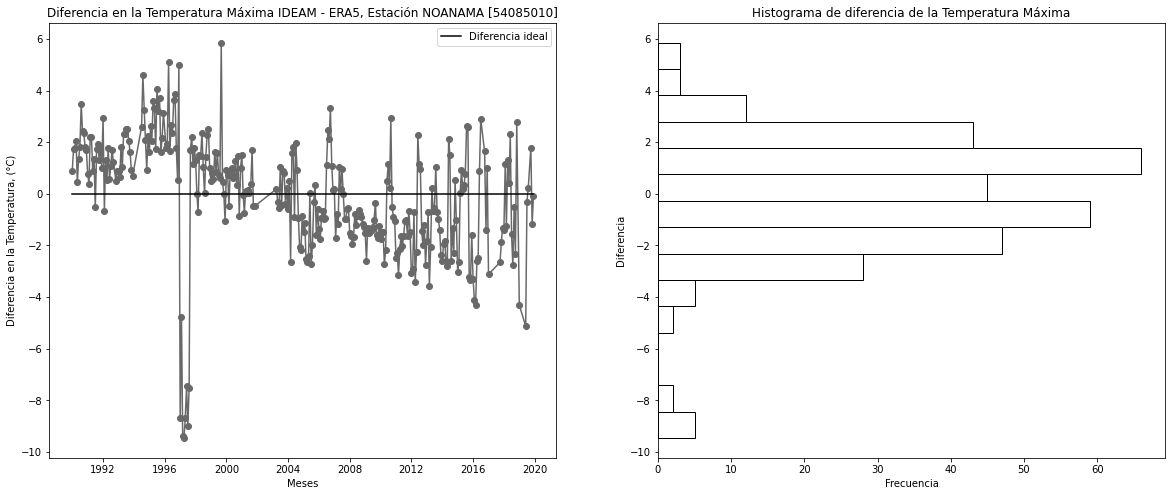


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN PANAMERICANA [56015010]


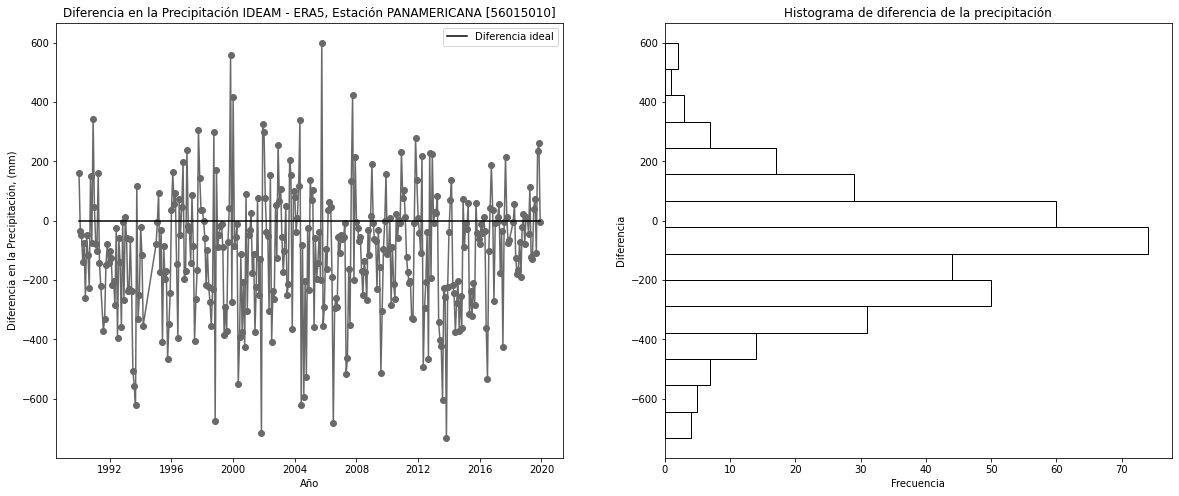

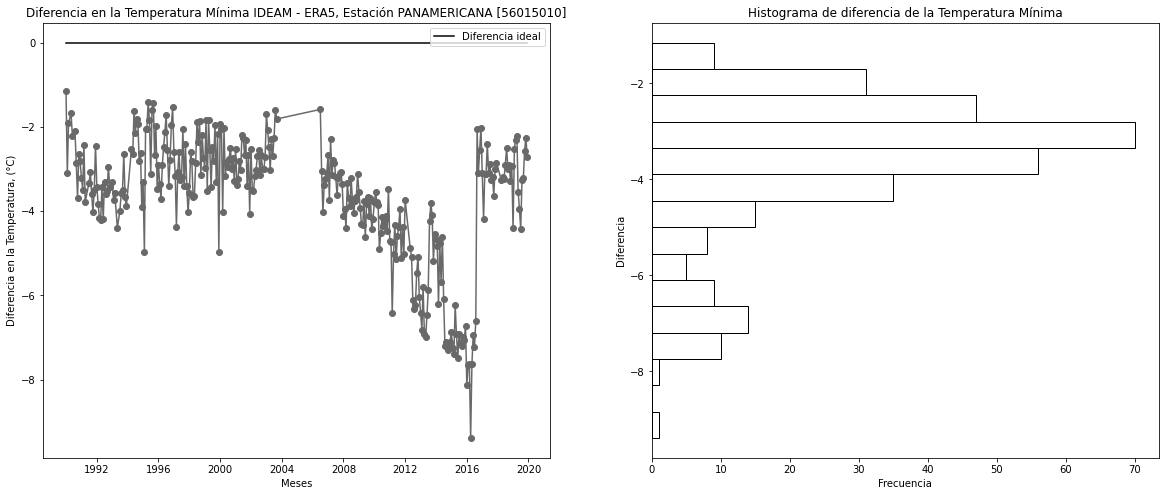

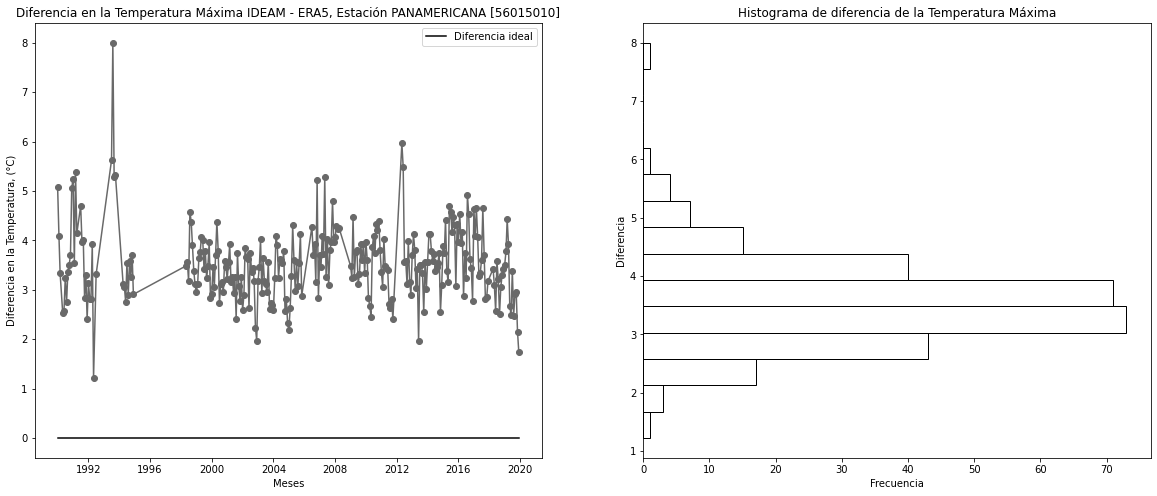


----------------------------------------------------------------------------------------------------------------------------------------------------------------
ESTACIÓN SAN JOSE PALMAR [54025010]


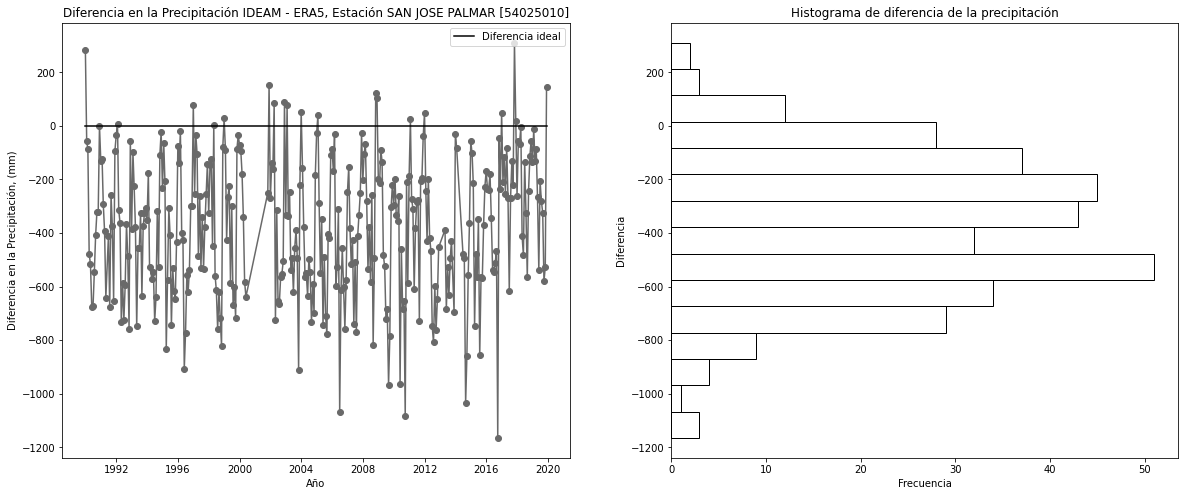

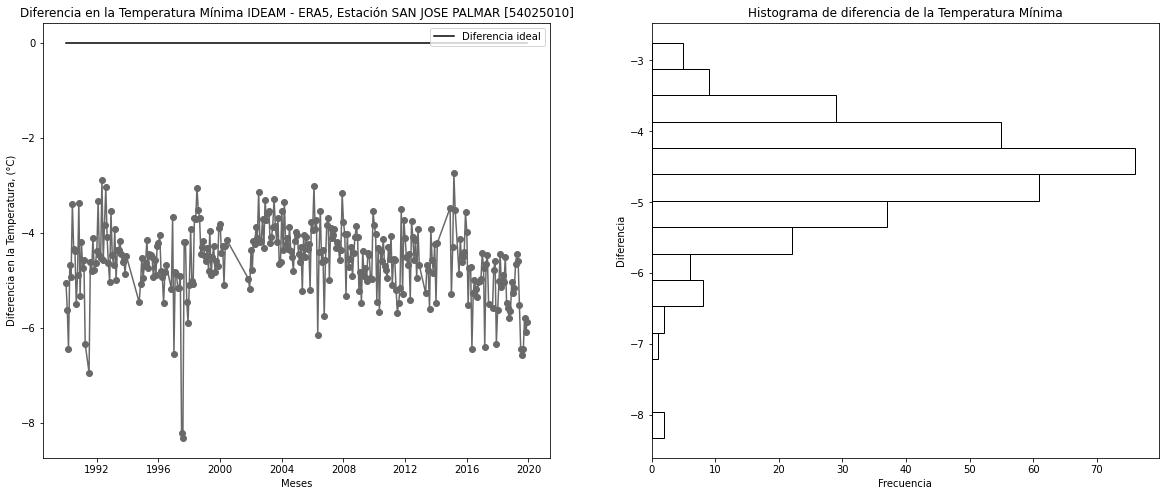

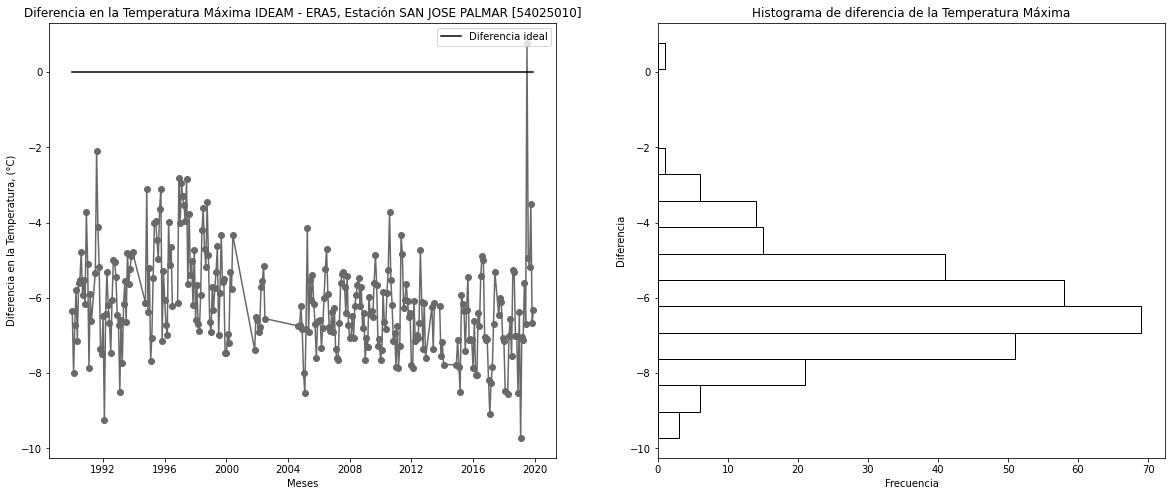


----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
gauss('AElCarnaro_1990-2019.xlsx')
gauss('BajoCalima_1990-2019.xlsx')
gauss('Noanama_1990-2019.xlsx')
gauss('Panamericana_1990-2019.xlsx')
gauss('SanJosePalmar_1990-2019.xlsx')

In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')
display(df)

FileNotFoundError: ignored

In [ ]:
def get_elevation(lat, lon):
    query = ('https://api.open-elevation.com/api/v1/lookup'
             f'?locations={lat},{lon}')
    r = requests.get(query).json()
    elevation = pd.io.json.json_normalize(r, 'results')['elevation'].values[0]
    return elevation

In [ ]:
ideam = []
for (i,j) in zip(df['lat'],df['lon']):
  print(i,j)
  ideam.append(get_elevation(i,j))
print(ideam)

In [ ]:
era = []
for (i,j) in zip(df['lat_E'],df['lon_E']):
  print(i,j)
  era.append(get_elevation(i,j))
print(era)

In [ ]:
altitud = {'ideam':ideam,'era5':era}
altitud = pd.DataFrame(altitud)
display(altitud)

In [ ]:
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
